# Plot DNA methylation statistics vs prediction accuracy

In [43]:
library(data.table)

In [44]:
df <- fread("37-OUT/37-OUT_result_table_no_dups.csv")

In [45]:
i <- 1

In [46]:
df$modified_methylation_data <- gsub("/dcs04/lieber/statsgen/mnagle/mwas/", "/expanse/lustre/projects/jhu152/naglemi/mwas/", df$modified_methylation_data)
df$modified_methylation_data <- gsub("\\.rds", ".nocovar.rds", df$modified_methylation_data)

df$path <- gsub("a2", "dt", df$path)
df$path_unmodified <- gsub("a2", "dt", df$path_unmodified)

In [47]:
head(df)

region,Chr,population,chunk_start,chunk_end,SNP_data,methylation_data,last_meth_value_with_SNP_coverage,first_meth_value_with_SNP_coverage,last_meth_index_with_SNP_coverage,first_meth_index_with_SNP_coverage,cov_file,modified_methylation_data,path,tag,path_unmodified,date,time,datetime
<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dttm>
caud,1,AA,8982,28981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,8982,/dcs04/lieber/statsgen/mnagle/mwas/full_covariates/AA_caud.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/pheno/caud/out/chr1_AA_8982-28981.nocovar.rds,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-20240510-121942.rds,caud_AA_1_8982_28981,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-caud-20240510-121942.rds,20240510,121942,2024-05-10 19:19:42
caud,1,AA,28982,48981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,8982,/dcs04/lieber/statsgen/mnagle/mwas/full_covariates/AA_caud.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/pheno/caud/out/chr1_AA_28982-48981.nocovar.rds,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-28982-48981-dynamic-1corestotal-allcorepera-20240510-122045.rds,caud_AA_1_28982_48981,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-28982-48981-dynamic-1corestotal-allcorepera-caud-20240510-122045.rds,20240510,122045,2024-05-10 19:20:45
caud,1,AA,48982,68981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,8982,/dcs04/lieber/statsgen/mnagle/mwas/full_covariates/AA_caud.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/pheno/caud/out/chr1_AA_48982-68981.nocovar.rds,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-48982-68981-dynamic-1corestotal-allcorepera-20240510-122147.rds,caud_AA_1_48982_68981,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-48982-68981-dynamic-1corestotal-allcorepera-caud-20240510-122147.rds,20240510,122147,2024-05-10 19:21:47
caud,1,AA,68982,88981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,8982,/dcs04/lieber/statsgen/mnagle/mwas/full_covariates/AA_caud.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/pheno/caud/out/chr1_AA_68982-88981.nocovar.rds,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-68982-88981-dynamic-1corestotal-allcorepera-20240510-122249.rds,caud_AA_1_68982_88981,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-68982-88981-dynamic-1corestotal-allcorepera-caud-20240510-122249.rds,20240510,122249,2024-05-10 19:22:49
caud,1,AA,88982,108981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,8982,/dcs04/lieber/statsgen/mnagle/mwas/full_covariates/AA_caud.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/pheno/caud/out/chr1_AA_88982-108981.nocovar.rds,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-88982-108981-dynamic-1corestotal-allcorepera-20240510-122350.rds,caud_AA_1_88982_108981,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-88982-108981-dynamic-1corestotal-allcorepera-caud-20240510-122350.rds,20240510,122350,2024-05-10 19:23:50
caud,1,AA,108982,128981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,8982,/dcs04/lieber/statsgen/mnagle/mwas/full_covariates/AA_caud.csv,/expanse/lustre/projects/jh

In [48]:
head(df$path_unmodified)

[1] "..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-caud-20240510-121942.rds"   
[2] "..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-28982-48981-dynamic-1corestotal-allcorepera-caud-20240510-122045.rds"  
[3] "..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-48982-68981-dynamic-1corestotal-allcorepera-caud-20240510-122147.rds"  
[4] "..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-68982-88981-dynamic-1corestotal-allcorepera-caud-20240510-122249.rds"  
[5] "..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-88982-108981-dynamic-1corestotal-allcorepera-caud-20240510-122350.rds" 
[6] "..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-108982-128981-dynamic-1corestotal-allcorepera-caud-20240510-122451.rds"

In [49]:
dim(df)

[1] 11421    19

In [50]:
getwd()

[1] "/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/scripts"

In [51]:
# Define the new base path to replace '../' with
new_base_path <- "/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS"

# Apply gsub to replace '../' at the start of each string in path and path_unmodified columns
# df[, `:=`(
#   path = gsub("^\\.\\./", paste0(new_base_path, "/"), path),
#   path_unmodified = gsub("^\\.\\./", paste0(new_base_path, "/"), path_unmodified)
# )]

In [52]:
head(df)

region,Chr,population,chunk_start,chunk_end,SNP_data,methylation_data,last_meth_value_with_SNP_coverage,first_meth_value_with_SNP_coverage,last_meth_index_with_SNP_coverage,first_meth_index_with_SNP_coverage,cov_file,modified_methylation_data,path,tag,path_unmodified,date,time,datetime
<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dttm>
caud,1,AA,8982,28981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,8982,/dcs04/lieber/statsgen/mnagle/mwas/full_covariates/AA_caud.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/pheno/caud/out/chr1_AA_8982-28981.nocovar.rds,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-20240510-121942.rds,caud_AA_1_8982_28981,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-caud-20240510-121942.rds,20240510,121942,2024-05-10 19:19:42
caud,1,AA,28982,48981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,8982,/dcs04/lieber/statsgen/mnagle/mwas/full_covariates/AA_caud.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/pheno/caud/out/chr1_AA_28982-48981.nocovar.rds,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-28982-48981-dynamic-1corestotal-allcorepera-20240510-122045.rds,caud_AA_1_28982_48981,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-28982-48981-dynamic-1corestotal-allcorepera-caud-20240510-122045.rds,20240510,122045,2024-05-10 19:20:45
caud,1,AA,48982,68981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,8982,/dcs04/lieber/statsgen/mnagle/mwas/full_covariates/AA_caud.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/pheno/caud/out/chr1_AA_48982-68981.nocovar.rds,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-48982-68981-dynamic-1corestotal-allcorepera-20240510-122147.rds,caud_AA_1_48982_68981,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-48982-68981-dynamic-1corestotal-allcorepera-caud-20240510-122147.rds,20240510,122147,2024-05-10 19:21:47
caud,1,AA,68982,88981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,8982,/dcs04/lieber/statsgen/mnagle/mwas/full_covariates/AA_caud.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/pheno/caud/out/chr1_AA_68982-88981.nocovar.rds,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-68982-88981-dynamic-1corestotal-allcorepera-20240510-122249.rds,caud_AA_1_68982_88981,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-68982-88981-dynamic-1corestotal-allcorepera-caud-20240510-122249.rds,20240510,122249,2024-05-10 19:22:49
caud,1,AA,88982,108981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,8982,/dcs04/lieber/statsgen/mnagle/mwas/full_covariates/AA_caud.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/pheno/caud/out/chr1_AA_88982-108981.nocovar.rds,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-88982-108981-dynamic-1corestotal-allcorepera-20240510-122350.rds,caud_AA_1_88982_108981,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-88982-108981-dynamic-1corestotal-allcorepera-caud-20240510-122350.rds,20240510,122350,2024-05-10 19:23:50
caud,1,AA,108982,128981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,8982,/dcs04/lieber/statsgen/mnagle/mwas/full_covariates/AA_caud.csv,/expanse/lustre/projects/jh

In [53]:
# Subset `df` to the first 50 rows for testing
#df <- df[1:50, ]

## Compute mean DNAm levels

In [54]:
setwd("/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/scripts/")

In [55]:
file.exists(df$path[1])

[1] FALSE

In [56]:
getwd()

[1] "/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/scripts"

In [57]:
head(list.files("../output_EXPANSE_dt_caud", pattern="8982-28981"))

[1] "libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-20240415-104419_cg-no-snps.csv"                                    
[2] "libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-20240415-104419_cv-eval_combined.csv"                              
[3] "libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-20240415-104419_dt_combined.csv"                                   
[4] "libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-20240415-104419_gwas_stat_bp_alleleprocessed_a2_results.csv"       
[5] "libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-20240415-104419_gwas_stat_bp_alleleprocessed_a2_results.rds"       
[6] "libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-20240415-104419_gwas_stat_bp_alleleprocessed_a3_results-101324.csv"

#### Debug - why all processing jobs fail?

In [58]:
# -----------------------------------------------------
# Simplified Debugging R Script for Processing DNAm Data (Single Iteration)
# -----------------------------------------------------

# Step 1: Load necessary libraries
cat("Step 1: Loading libraries...\n")
if (!requireNamespace("data.table", quietly = TRUE)) stop("Package 'data.table' not installed.")
library(data.table)
cat("Loaded 'data.table'.\n")

if (!requireNamespace("stringr", quietly = TRUE)) stop("Package 'stringr' not installed.")
library(stringr)
cat("Loaded 'stringr'.\n")

# Step 2: Generate unique suffix
cat("\nStep 2: Generating unique suffix...\n")
unique_suffix <- paste0(format(Sys.time(), "%Y%m%d%H%M%S"), "_", sample(1000:9999, 1))
cat("Unique suffix:", unique_suffix, "\n")

# Step 3: Validate data frame 'df'
cat("\nStep 3: Validating data frame 'df'...\n")
if (!exists("df")) stop("Data frame 'df' does not exist.")
required_columns <- c(
  "Chr", "population", "region", "chunk_start", "chunk_end",
  "SNP_data", "methylation_data", "last_meth_value_with_SNP_coverage",
  "first_meth_value_with_SNP_coverage", "last_meth_index_with_SNP_coverage",
  "first_meth_index_with_SNP_coverage", "cov_file",
  "modified_methylation_data", "path"
)
missing_columns <- setdiff(required_columns, names(df))
if (length(missing_columns) > 0) stop(paste("Missing columns:", paste(missing_columns, collapse=", ")))
cat("All required columns are present.\n")

# Step 4: Process first row
cat("\nStep 4: Processing the first row of 'df'...\n")
row <- df[1, ]
cat("Processing row 1...\n")

# Step 4.1: Transform 'path' to CSV path
cat("\nStep 4.1: Transforming 'path' to CSV path...\n")
original_path <- row$path_unmodified
cat("Original path:", original_path, "\n")

transformed_path <- str_replace(original_path, "a2", "dt")
#transformed_path <- original_path
cat("Transformed path (replaced 'a2' with 'dt'):", transformed_path, "\n")

csv_path <- str_replace(transformed_path, ".rds", "_cv-eval_combined.csv")
cat("CSV path (replaced '.rds' with '_cv-eval_combined.csv'):", csv_path, "\n")

normalized_csv_path <- normalizePath(csv_path, winslash = "/", mustWork = FALSE)
cat("Normalized CSV path:", normalized_csv_path, "\n")

# Step 4.2: Define output directory and filename
cat("\nStep 4.2: Defining output directory and filename with unique suffix...\n")
input_dir <- dirname(normalized_csv_path)
cat("Input directory:", input_dir, "\n")

output_dir <- paste0(input_dir, "_DNAm-mean-var_", unique_suffix)
cat("Output directory:", output_dir, "\n")
dir.create(output_dir, recursive = TRUE)
cat("Created output directory.\n")

csv_basename <- basename(normalized_csv_path)
output_filename <- str_replace(csv_basename, "_cv-eval_combined\\.csv$", paste0("_DNAm_meanvar_", unique_suffix, ".csv"))
cat("Output filename with unique suffix:", output_filename, "\n")

output_filepath <- file.path(output_dir, output_filename)
cat("Full output file path:", output_filepath, "\n")

# Step 4.3: Read methylation data
cat("\nStep 4.3: Reading modified methylation data...\n")
methylation_data <- readRDS(row$modified_methylation_data)
cat("Loaded methylation data.\n")

# Step 4.4: Extract methylation matrix
cat("\nStep 4.4: Extracting methylation matrix...\n")
methyl_matrix <- as.matrix(methylation_data@methylations)
cat("Extracted methylation matrix.\n")

# Step 4.5: Calculate mean and variance DNAm levels
cat("\nStep 4.5: Calculating mean and variance of DNAm levels...\n")
mean_dnAm <- colMeans(methyl_matrix, na.rm=TRUE)
var_dnAm <- apply(methyl_matrix, 2, var, na.rm=TRUE)
cat("Calculated mean and variance.\n")

# Step 4.6: Create statistics dataframe
cat("\nStep 4.6: Creating statistics dataframe...\n")
cg_numeric <- as.numeric(str_replace(colnames(methyl_matrix), "^pos_", ""))
cat("Extracted CpG numeric positions from column names.\n")

# Handle NAs in cg_numeric
if (any(is.na(cg_numeric))) {
  cat("Found NAs in 'cg_numeric'. Removing corresponding positions.\n")
  valid_indices <- which(!is.na(cg_numeric))
  cg_numeric <- cg_numeric[valid_indices]
  mean_dnAm <- mean_dnAm[valid_indices]
  var_dnAm <- var_dnAm[valid_indices]
  methyl_matrix <- methyl_matrix[, valid_indices, drop = FALSE]
}

stats_df <- data.frame(
  cg_numeric = cg_numeric,
  Mean_DNAm_Level = mean_dnAm,
  Var_DNAm_Level = var_dnAm,
  stringsAsFactors = FALSE
)
cat("Created statistics dataframe.\n")

# Step 4.7: Read CSV data
cat("\nStep 4.7: Reading CSV data...\n")
csv_data <- fread(normalized_csv_path)
cat("Loaded CSV data.\n")

# Step 4.8: Merge statistics with CSV data
cat("\nStep 4.8: Merging statistics with CSV data...\n")
csv_data[, cg_numeric := as.numeric(cg)]
merged_data <- merge(csv_data, stats_df, by = "cg_numeric", all.x = TRUE)
cat("Merged statistics with CSV data.\n")

# Step 4.9: Categorize model performance into bins
cat("\nStep 4.9: Categorizing model performance into bins...\n")
merged_data$performance_bin <- cut(
  merged_data$cor,
  breaks = seq(0, 1, by = 0.1),
  include.lowest = TRUE,
  labels = paste0(seq(0, 0.9, by = 0.1), "-", seq(0.1, 1, by = 0.1))
)
cat("Categorized 'cor' into performance bins.\n")

# Step 4.10: Add group identifiers
cat("\nStep 4.10: Adding group identifiers...\n")
merged_data$population <- row$population
merged_data$region <- row$region
cat("Added 'population' and 'region' columns to merged data.\n")

# Step 4.11: Save the combined data
cat("\nStep 4.11: Saving the combined data...\n")
fwrite(merged_data, output_filepath)
cat("Saved combined data to", output_filepath, "\n")

# Step 5: Update 'df' with output path and status
cat("\nStep 5: Updating 'df' with output path and processing status...\n")
df$output_file_path <- NA
df$processing_status <- "Not Processed"
df$processing_message <- "Processing not performed in debugging script."
df$output_file_path[1] <- output_filepath
df$processing_status[1] <- "Success"
df$processing_message[1] <- "Successfully processed."
cat("Updated 'df' with output path and status for the first row.\n")

# Step 6: View the updated data frame
cat("\nStep 6: Displaying the updated 'df':\n")
print(df)

cat("\nEnd of debugging script. Processing of the first row is complete.\n")

Step 1: Loading libraries...
Loaded 'data.table'.
Loaded 'stringr'.

Step 2: Generating unique suffix...
Unique suffix: 20241030094845_5715 

Step 3: Validating data frame 'df'...
All required columns are present.

Step 4: Processing the first row of 'df'...
Processing row 1...

Step 4.1: Transforming 'path' to CSV path...
Original path: ..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-caud-20240510-121942.rds 
Transformed path (replaced 'a2' with 'dt'): ..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-caud-20240510-121942.rds 
CSV path (replaced '.rds' with '_cv-eval_combined.csv'): ..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-caud-20240510-121942_cv-eval_combined.csv 
Normalized CSV path: /expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dyn

In [59]:
file.exists(df$output_file_path[1])

[1] TRUE

In [60]:
getwd()

[1] "/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/scripts"

#### Deploy

In [61]:
# -----------------------------------------------------
# Parallel R Script for Processing DNAm Data and Saving Mean & Variance
# -----------------------------------------------------

# ---------------------------
# 1. Load Necessary Libraries
# ---------------------------

# Load required libraries
library(data.table)   # For efficient data manipulation and CSV reading
library(foreach)      # For parallel processing
library(doParallel)   # Backend for foreach
library(stringr)      # For string operations (optional but recommended)

# ---------------------------
# 2. Setup Parallel Backend
# ---------------------------

# Detect the number of available cores
num_cores <- 48  # As specified

# Ensure that the number of cores does not exceed the available cores
available_cores <- parallel::detectCores()
if (num_cores > available_cores) {
  warning(paste("Requested", num_cores, "cores, but only", available_cores, "are available. Using", available_cores, "cores instead."))
  num_cores <- available_cores
}

# Register the parallel backend
cl <- makeCluster(num_cores)
registerDoParallel(cl)
cat(paste("Registered parallel backend with", num_cores, "cores.\n"))

# ---------------------------
# 3. Define Helper Functions
# ---------------------------

# Function to categorize 'cor' into performance bins
categorize_performance <- function(cor_values) {
  bins <- cut(
    cor_values,
    breaks = seq(0, 1, by = 0.1),
    include.lowest = TRUE,
    labels = paste0(seq(0, 0.9, by = 0.1), "-", seq(0.1, 1, by = 0.1))
  )
  return(bins)
}

# Function to generate a unique suffix
generate_unique_suffix <- function() {
  # Generate a timestamp-based suffix
  timestamp <- format(Sys.time(), "%Y%m%d%H%M%S")
  # Generate a random number
  random_num <- sample(1000:9999, 1)
  # Combine both to form a unique suffix
  unique_suffix <- paste0(timestamp, "_", random_num)
  return(unique_suffix)
}

# ---------------------------
# 4. Generate Unique Suffix for This Run
# ---------------------------

unique_suffix <- generate_unique_suffix()
cat(paste("Generated unique suffix for this run:", unique_suffix, "\n"))

# ---------------------------
# 5. Iterate Over Each Row in `df` in Parallel
# ---------------------------

# Assuming `df` is already loaded in your R environment
# and contains the required columns as specified.

# Check if `df` exists
if (!exists("df")) {
  stop("The data frame 'df' is not loaded. Please load your data before running the script.")
}

# Define required columns
required_columns <- c("Chr", "population", "region", "chunk_start", "chunk_end",
                     "SNP_data", "methylation_data", "last_meth_value_with_SNP_coverage",
                     "first_meth_value_with_SNP_coverage", "last_meth_index_with_SNP_coverage",
                     "first_meth_index_with_SNP_coverage", "cov_file",
                     "modified_methylation_data", "path")

# Check for missing columns
missing_columns <- setdiff(required_columns, names(df))
if (length(missing_columns) > 0) {
  stop(paste("The following required columns are missing from df:", 
             paste(missing_columns, collapse = ", ")))
}

# Number of rows to process
num_rows <- nrow(df)
cat(paste("Number of rows to process:", num_rows, "\n"))

# Initialize a vector to store output file paths
output_paths <- vector("character", length = num_rows)

# Parallel processing using foreach
output_results <- foreach(i = 1:num_rows, .packages = c("data.table", "stringr")) %dopar% {
  source("/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/scripts/modified_MI.R")
  # Initialize a list to store the result for this iteration
  result <- list(output_path = NA, status = "Success", message = "")
  
  # Extract the current row
  row <- df[i, ]
  
  # ---------------------------
  # 5.1. Transform `path` to CSV Path
  # ---------------------------
  
  original_path <- row$path_unmodified
  
  # Replace "a2" with "dt"
  transformed_path <- str_replace(original_path, fixed("a2"), "dt")
  
  # Replace ".rds" with "_cv-eval_combined.csv"
  transformed_csv_path <- str_replace(transformed_path, fixed(".rds"), "_cv-eval_combined.csv")
  
  # Normalize the path to handle any residual issues
  normalized_csv_path <- normalizePath(transformed_csv_path, winslash = "/", mustWork = FALSE)
  
  # ---------------------------
  # 5.2. Define Output Directory and Filename with Unique Suffix
  # ---------------------------
  
  # Extract the directory path from the transformed CSV path
  input_dir <- dirname(normalized_csv_path)
  
  # Define the new output directory by appending "_DNAm-mean-var" and unique suffix
  output_dir <- paste0(input_dir, "_DNAm-mean-var_", unique_suffix)
  
  # Create the output directory if it doesn't exist
  if (!dir.exists(output_dir)) {
    dir.create(output_dir, recursive = TRUE)
    # Note: Directory creation might fail; handle with tryCatch if necessary
  }
  
  # Extract the base name of the CSV file
  csv_basename <- basename(normalized_csv_path)
  
  # Remove the original file extension and append "_DNAm_meanvar_<unique_suffix>.rds"
  output_filename <- str_replace(csv_basename, "_cv-eval_combined\\.csv$", paste0("_DNAm_meanvar_", unique_suffix, ".rds"))
  
  # Define the full path for the output file
  output_filepath <- file.path(output_dir, output_filename)
  
  # ---------------------------
  # 5.3. Read Modified Methylation Data (.rds)
  # ---------------------------
  
  modified_methylation_path <- row$modified_methylation_data
  
  # Check if the modified methylation file exists
  if (!file.exists(modified_methylation_path)) {
    result$status <- "Failed"
    result$message <- paste("Modified methylation data file does not exist:", modified_methylation_path)
    return(result)
  }
  
  # Load the methylation data
  methylation_data <- tryCatch({
    readRDS(modified_methylation_path)
  }, error = function(e) {
    result$status <- "Failed"
    result$message <- paste("Error reading modified methylation data:", e$message)
    return(result)
  })
  
  # Check if loading was successful
  if (result$status == "Failed") {
    return(result)
  }
  
  # ---------------------------
  # 5.4. Extract Methylation Matrix
  # ---------------------------
  
  # Check if 'methylations' slot exists
  if (!"methylations" %in% slotNames(methylation_data)) {
    result$status <- "Failed"
    result$message <- paste("The object does not contain 'methylations' slot:", modified_methylation_path)
    return(result)
  }
  
  # Extract the methylation matrix (samples as rows, positions as columns)
  methylations_matrix <- tryCatch({
    as.matrix(methylation_data@methylations)
  }, error = function(e) {
    result$status <- "Failed"
    result$message <- paste("Error extracting methylation matrix:", e$message)
    return(result)
  })
  
  # Check if extraction was successful
  if (result$status == "Failed") {
    return(result)
  }
  
  # ---------------------------
  # 5.5. Calculate Mean and Variance DNAm Levels
  # ---------------------------
  
  # Calculate column-wise mean and variance
  mean_dnAm <- tryCatch({
    colMeans(methylations_matrix, na.rm = TRUE)
  }, error = function(e) {
    result$status <- "Failed"
    result$message <- paste("Error calculating column-wise means:", e$message)
    return(result)
  })
  
  if (result$status == "Failed") {
    return(result)
  }
  
  var_dnAm <- tryCatch({
    apply(methylations_matrix, 2, var, na.rm = TRUE)
  }, error = function(e) {
    result$status <- "Failed"
    result$message <- paste("Error calculating column-wise variances:", e$message)
    return(result)
  })
  
  if (result$status == "Failed") {
    return(result)
  }
  
  # ---------------------------
  # 5.6. Create Statistics Data Frame
  # ---------------------------
  
  # Extract CpG positions from column names by removing 'pos_' prefix
  cg_numeric <- as.numeric(str_replace(colnames(methylations_matrix), "^pos_", ""))
  
  # Check for NAs introduced by coercion
  if (any(is.na(cg_numeric))) {
    warning("NAs introduced by coercion when converting column names to numeric for 'cg_numeric'.")
    # Remove positions with NA cg_numeric
    valid_indices <- which(!is.na(cg_numeric))
    cg_numeric <- cg_numeric[valid_indices]
    mean_dnAm <- mean_dnAm[valid_indices]
    var_dnAm <- var_dnAm[valid_indices]
    methylations_matrix <- methylations_matrix[, valid_indices, drop = FALSE]
  }
  
  # Create a data frame with statistics
  stats_df <- data.frame(
    cg_numeric = cg_numeric,
    Mean_DNAm_Level = mean_dnAm,
    Var_DNAm_Level = var_dnAm,
    stringsAsFactors = FALSE
  )
  
  # ---------------------------
  # 5.7. Read CSV Data
  # ---------------------------
  
  # Check if the CSV file exists
  if (!file.exists(normalized_csv_path)) {
    result$status <- "Failed"
    result$message <- paste("CSV data file does not exist:", normalized_csv_path)
    return(result)
  }
  
  # Read the CSV file using data.table::fread for efficiency
  csv_data <- tryCatch({
    fread(normalized_csv_path)
  }, error = function(e) {
    result$status <- "Failed"
    result$message <- paste("Error reading CSV data:", e$message)
    return(result)
  })
  
  # Check if reading was successful
  if (result$status == "Failed") {
    return(result)
  }
  
  # ---------------------------
  # 5.8. Merge Statistics with CSV Data
  # ---------------------------
  
  # Ensure 'cg' exists and is numeric
  if (!"cg" %in% names(csv_data)) {
    result$status <- "Failed"
    result$message <- "Column 'cg' not found in CSV data."
    return(result)
  }
  
  # Convert 'cg' to numeric
  csv_data[, cg_numeric := as.numeric(cg)]
  
  # Remove rows with NA cg_numeric
  csv_data <- csv_data[!is.na(cg_numeric)]
  
  # Merge stats with CSV data on 'cg_numeric'
  merged_data <- merge(csv_data, stats_df, by = "cg_numeric", all.x = TRUE)
  
  # ---------------------------
  # 5.9. Categorize Model Performance into Bins
  # ---------------------------
  
  # Check if 'cor' column exists
  if (!"cor" %in% names(merged_data)) {
    result$status <- "Failed"
    result$message <- "Column 'cor' not found in merged data."
    return(result)
  }
  
  # Categorize 'cor' into performance bins
  merged_data[, performance_bin := categorize_performance(cor)]
  
  # Remove rows with NA performance_bin
  merged_data <- merged_data[!is.na(performance_bin)]
  
  # ---------------------------
  # 5.10. Add Group Identifiers
  # ---------------------------
  
  merged_data[, population := row$population]
  merged_data[, region := row$region]
  
  # ---------------------------
  # 5.11. Save the Combined Data
  # ---------------------------
  
  # Save the combined data as an .rds file
  save_status <- tryCatch({
    # No it should be a CSV!!!!
    output_filepath <- gsub("rds", "csv", output_filepath)
    #saveRDS(merged_data, file = output_filepath)
    fwrite(merged_data, output_filepath)
    TRUE
  }, error = function(e) {
    result$status <- "Failed"
    result$message <- paste("Error saving processed data:", e$message)
    return(FALSE)
  })
  
  if (save_status == TRUE) {
    result$output_path <- output_filepath
    result$status <- "Success"
    result$message <- paste("Successfully processed and saved:", output_filepath)
  }
  
  return(result)
}

# ---------------------------
# 6. Process and Update Output Paths
# ---------------------------

# Stop the parallel backend
stopCluster(cl)
cat("Stopped parallel backend.\n")

# Initialize a vector to store output file paths
output_paths <- character(num_rows)

# Initialize vectors to store statuses and messages
statuses <- character(num_rows)
messages <- character(num_rows)

# Iterate over the results and populate the vectors
for (i in 1:num_rows) {
  output_results_i <- output_results[[i]]
  output_paths[i] <- output_results_i$output_path
  statuses[i] <- output_results_i$status
  messages[i] <- output_results_i$message
}

# ---------------------------
# 7. Add Output Paths to `df`
# ---------------------------

# Add a new column to `df` for output file paths
df$output_file_path <- output_paths

# Optionally, you can also add status and message columns for more detailed logging
df$processing_status <- statuses
df$processing_message <- messages

# ---------------------------
# 8. Save or View the Updated Data Frame
# ---------------------------

# Optionally, save the updated `df` with output paths
# Uncomment the following line to save `df` as a CSV
# write.csv(df, "df_with_output_paths.csv", row.names = FALSE)

# Or, save as RDS for faster loading in future sessions
# saveRDS(df, "df_with_output_paths.rds")

# Print the updated data frame
#print(df)

# ---------------------------
# 9. End of Script
# ---------------------------

cat("\nProcessing completed. Output file paths have been added to the 'df' data frame.\n")

Registered parallel backend with 48 cores.
Generated unique suffix for this run: 20241030094901_9057 
Number of rows to process: 11421 


## 

In [20]:
fwrite(df, "46-INTERMEDIATE_df_aggregating.csv")

In [76]:
df <- fread("46-INTERMEDIATE_df_aggregating.csv")

In [63]:
dim(df)

[1] 11421    22

In [64]:
test <- readRDS("/expanse/lustre/projects/jhu152/naglemi/mwas/pheno/caud/out/chr1_AA_8982-28981.nocovar.rds")
test@methylations
#if(test@methylations) print("This error shouldn't happen")

,pos_1069461,pos_1069467,pos_1069470,pos_1069477,pos_1069484,pos_1069498,pos_1069506,pos_1069516,pos_1069530,pos_1069533,⋯,pos_1584511,pos_1584521,pos_1584527,pos_1584574,pos_1584587,pos_1584636,pos_1584641,pos_1584693,pos_1584705,pos_1584738
Br1003,0.05328576,0.05496338,0.05582869,0.05791872,0.06011152,0.06482308,0.06772184,0.07156966,0.07740104,0.07872144,⋯,0.7787562,0.7755083,0.7735599,0.7584077,0.7542870,0.7392711,0.7377986,0.7233876,0.7203385,0.7126040
Br1004,0.06604958,0.06825526,0.06939365,0.07214511,0.07503443,0.08124995,0.08507805,0.09016300,0.09787432,0.09962089,⋯,0.7801988,0.7788005,0.7779691,0.7716943,0.7700467,0.7642686,0.7637223,0.7586034,0.7575825,0.7551245
Br1007,0.06559238,0.06742524,0.06836372,0.07061196,0.07297052,0.07812503,0.08134868,0.08568228,0.09235545,0.09388254,⋯,0.7481502,0.7483537,0.7484852,0.7497576,0.7501852,0.7520890,0.7523090,0.7548779,0.7555426,0.7575078
Br1017,0.03377177,0.03523308,0.03599421,0.03785308,0.03983400,0.04419361,0.04694400,0.05067264,0.05648711,0.05783034,⋯,0.7294278,0.7284573,0.7278841,0.7236594,0.7225842,0.7189608,0.7186328,0.7157421,0.7152204,0.7140945
Br1021,0.07817539,0.08118077,0.08273753,0.08651483,0.09050200,0.09914112,0.10449762,0.11164715,0.12254812,0.12502484,⋯,0.7348386,0.7322426,0.7306904,0.7187484,0.7155398,0.7039909,0.7028708,0.6920376,0.6897789,0.6841150
Br1030,0.06257611,0.06465182,0.06572109,0.06829992,0.07099977,0.07678064,0.08032359,0.08501032,0.09207768,0.09367199,⋯,0.7478756,0.7473409,0.7470487,0.7454769,0.7452566,0.7451936,0.7452515,0.7464892,0.7469274,0.7483938
Br1039,0.05383903,0.05559958,0.05651535,0.05874780,0.06111977,0.06631130,0.06956490,0.07394816,0.08072000,0.08227350,⋯,0.7195453,0.7175125,0.7162932,0.7067997,0.7042074,0.6946707,0.6937243,0.6842785,0.6822195,0.6768400
Br1040,0.04001060,0.04157276,0.04238483,0.04436347,0.04646491,0.05106454,0.05394903,0.05783895,0.06386000,0.06524349,⋯,0.7659200,0.7653016,0.7649360,0.7622360,0.7615481,0.7592340,0.7590253,0.7572036,0.7568814,0.7562064
Br1050,0.05083080,0.05239641,0.05320424,0.05515607,0.05720473,0.06160844,0.06431850,0.06791603,0.07336735,0.07460143,⋯,0.7093427,0.7085495,0.7080925,0.7050150,0.7043257,0.7023851,0.7022470,0.7014900,0.7014950,0.7018648
Br1053,0.06194408,0.06406742,0.06516442,0.06781850,0.07060912,0.07662167,0.08032925,0.08525727,0.09273328,0.09442647,⋯,0.7786283,0.7777214,0.7771808,0.7730591,0.7719606,0.7680236,0.7676423,0.7639409,0.7631622,0.7611855


In [65]:
file.exists(gsub("dt", "a2", df$path_unmodified[1]))

[1] TRUE

In [66]:
getwd()

[1] "/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/scripts"

In [67]:
list.files("..//output_EXPANSE_a2_caud/", pattern = "libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-20240415-104419.rds")

[1] "libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-20240415-104419.rds"

In [68]:
basename(df$path[1])

[1] "libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-20240510-121942.rds"

In [69]:
basename(df$path_unmodified[1])

[1] "libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-caud-20240510-121942.rds"

In [70]:
path.expand(df$path_unmodified[1])

[1] "..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-caud-20240510-121942.rds"

In [71]:
head(df)

region,Chr,population,chunk_start,chunk_end,SNP_data,methylation_data,last_meth_value_with_SNP_coverage,first_meth_value_with_SNP_coverage,last_meth_index_with_SNP_coverage,⋯,modified_methylation_data,path,tag,path_unmodified,date,time,datetime,output_file_path,processing_status,processing_message
<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dttm>,<chr>,<chr>,<chr>
caud,1,AA,8982,28981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,⋯,/expanse/lustre/projects/jhu152/naglemi/mwas/pheno/caud/out/chr1_AA_8982-28981.nocovar.rds,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-20240510-121942.rds,caud_AA_1_8982_28981,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-caud-20240510-121942.rds,20240510,121942,2024-05-10 19:19:42,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-caud-20240510-121942_DNAm_meanvar_20241030091939_4182.csv,Success,Successfully processed and saved: /expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-caud-20240510-121942_DNAm_meanvar_20241030091939_4182.csv
caud,1,AA,28982,48981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,⋯,/expanse/lustre/projects/jhu152/naglemi/mwas/pheno/caud/out/chr1_AA_28982-48981.nocovar.rds,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-28982-48981-dynamic-1corestotal-allcorepera-20240510-122045.rds,caud_AA_1_28982_48981,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-28982-48981-dynamic-1corestotal-allcorepera-caud-20240510-122045.rds,20240510,122045,2024-05-10 19:20:45,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-28982-48981-dynamic-1corestotal-allcorepera-caud-20240510-122045_DNAm_meanvar_20241030091939_4182.csv,Success,Successfully processed and saved: /expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-28982-48981-dynamic-1corestotal-allcorepera-caud-20240510-122045_DNAm_meanvar_20241030091939_4182.csv
caud,1,AA,48982,68981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,⋯,/expanse/lustre/projects/jhu152/naglemi/mwas/pheno/caud/out/chr1_AA_48982-68981.nocovar.rds,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-48982-68981-dynamic-1corestotal-allcorepera-20240510-122147.rds,caud_AA_1_48982_68981,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-48982-68981-dynamic-1corestotal-allcorepera-caud-20240510-122147.rds,20240510,122147,2024-05-10 19:21:47,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-48982-68981-dynamic-1corestotal-allcorepera-caud-20240510-122147_DNAm_meanvar_20241030091939_4182.csv,Success,Successfully processed and saved: /expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-48982-68981-dynamic-1corestotal-allcorepera-caud-20240510-122147_DNAm_meanvar_20241030091939_4182.csv
caud,1,AA,68982,88981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,

In [72]:
levels(factor(df$processing_status))

[1] "Success"

In [74]:
head(df)

region,Chr,population,chunk_start,chunk_end,SNP_data,methylation_data,last_meth_value_with_SNP_coverage,first_meth_value_with_SNP_coverage,last_meth_index_with_SNP_coverage,⋯,modified_methylation_data,path,tag,path_unmodified,date,time,datetime,output_file_path,processing_status,processing_message
<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dttm>,<chr>,<chr>,<chr>
caud,1,AA,8982,28981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,⋯,/expanse/lustre/projects/jhu152/naglemi/mwas/pheno/caud/out/chr1_AA_8982-28981.nocovar.rds,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-20240510-121942.rds,caud_AA_1_8982_28981,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-caud-20240510-121942.rds,20240510,121942,2024-05-10 19:19:42,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-caud-20240510-121942_DNAm_meanvar_20241030091939_4182.csv,Success,Successfully processed and saved: /expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-caud-20240510-121942_DNAm_meanvar_20241030091939_4182.csv
caud,1,AA,28982,48981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,⋯,/expanse/lustre/projects/jhu152/naglemi/mwas/pheno/caud/out/chr1_AA_28982-48981.nocovar.rds,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-28982-48981-dynamic-1corestotal-allcorepera-20240510-122045.rds,caud_AA_1_28982_48981,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-28982-48981-dynamic-1corestotal-allcorepera-caud-20240510-122045.rds,20240510,122045,2024-05-10 19:20:45,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-28982-48981-dynamic-1corestotal-allcorepera-caud-20240510-122045_DNAm_meanvar_20241030091939_4182.csv,Success,Successfully processed and saved: /expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-28982-48981-dynamic-1corestotal-allcorepera-caud-20240510-122045_DNAm_meanvar_20241030091939_4182.csv
caud,1,AA,48982,68981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,⋯,/expanse/lustre/projects/jhu152/naglemi/mwas/pheno/caud/out/chr1_AA_48982-68981.nocovar.rds,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-48982-68981-dynamic-1corestotal-allcorepera-20240510-122147.rds,caud_AA_1_48982_68981,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-48982-68981-dynamic-1corestotal-allcorepera-caud-20240510-122147.rds,20240510,122147,2024-05-10 19:21:47,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-48982-68981-dynamic-1corestotal-allcorepera-caud-20240510-122147_DNAm_meanvar_20241030091939_4182.csv,Success,Successfully processed and saved: /expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-48982-68981-dynamic-1corestotal-allcorepera-caud-20240510-122147_DNAm_meanvar_20241030091939_4182.csv
caud,1,AA,68982,88981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,

In [75]:
# -----------------------------------------------------
# Parallel R Script for Processing DNAm Data and Saving Mean & Variance
# -----------------------------------------------------

# ---------------------------
# 1. Load Necessary Libraries
# ---------------------------

# Load required libraries
library(data.table)   # For efficient data manipulation and CSV reading
library(foreach)      # For parallel processing
library(doParallel)   # Backend for foreach
library(stringr)      # For string operations (optional but recommended)

# ---------------------------
# 2. Setup Parallel Backend
# ---------------------------

# Detect the number of available cores
num_cores <- 48 # As specified

# Ensure that the number of cores does not exceed the available cores
available_cores <- parallel::detectCores()
if (num_cores > available_cores) {
  warning(paste("Requested", num_cores, "cores, but only", available_cores, "are available. Using", available_cores, "cores instead."))
  num_cores <- available_cores
}

# Register the parallel backend
cl <- makeCluster(num_cores)
registerDoParallel(cl)
cat(paste("Registered parallel backend with", num_cores, "cores.\n"))

# ---------------------------
# 3. Define Helper Functions
# ---------------------------

# Function to categorize 'cor' into performance bins
categorize_performance <- function(cor_values) {
  bins <- cut(
    cor_values,
    breaks = seq(0, 1, by = 0.1),
    include.lowest = TRUE,
    labels = paste0(seq(0, 0.9, by = 0.1), "-", seq(0.1, 1, by = 0.1))
  )
  return(bins)
}

# Function to generate a unique suffix
generate_unique_suffix <- function() {
  # Generate a timestamp-based suffix
  timestamp <- format(Sys.time(), "%Y%m%d%H%M%S")
  # Generate a random number
  random_num <- sample(1000:9999, 1)
  # Combine both to form a unique suffix
  unique_suffix <- paste0(timestamp, "_", random_num)
  return(unique_suffix)
}

# ---------------------------
# 4. Generate Unique Suffix for This Run
# ---------------------------

unique_suffix <- generate_unique_suffix()
cat(paste("Generated unique suffix for this run:", unique_suffix, "\n"))

# ---------------------------
# 5. Iterate Over Each Row in `df` in Parallel
# ---------------------------

# Assuming `df` is already loaded in your R environment
# and contains the required columns as specified.

# Check if `df` exists
if (!exists("df")) {
  stop("The data frame 'df' is not loaded. Please load your data before running the script.")
}

# Define required columns
required_columns <- c("Chr", "population", "region", "chunk_start", "chunk_end",
                     "SNP_data", "methylation_data", "last_meth_value_with_SNP_coverage",
                     "first_meth_value_with_SNP_coverage", "last_meth_index_with_SNP_coverage",
                     "first_meth_index_with_SNP_coverage", "cov_file",
                     "modified_methylation_data", "path", "path_unmodified")

# Check for missing columns
missing_columns <- setdiff(required_columns, names(df))
if (length(missing_columns) > 0) {
  stop(paste("The following required columns are missing from df:", 
             paste(missing_columns, collapse = ", ")))
}

# Number of rows to process
num_rows <- nrow(df)
cat(paste("Number of rows to process:", num_rows, "\n"))

# Initialize a vector to store output file paths
output_paths <- vector("character", length = num_rows)

# Parallel processing using foreach
output_results <- foreach(i = 1:num_rows, .packages = c("data.table", "stringr")) %dopar% {
  
  # Initialize a list to store the result for this iteration
  source("/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/scripts/modified_MI.R")
  result <- list(output_path = NA, status = "Success", message = "")
  
  # Extract the current row
  row <- df[i, ]
  
  # ---------------------------
  # 5.1. Transform `path` to CSV Path
  # ---------------------------
  
  original_path <- row$path_unmodified
  
  # Replace "a2" with "dt"
  transformed_path <- str_replace(original_path, fixed("dt"), "a2")
  
  # Replace ".rds" with "_cv-eval_combined.csv"
  transformed_csv_path <- str_replace(transformed_path, fixed(".rds"), "_cv-eval_combined.csv")
  
  # Normalize the path to handle any residual issues
  normalized_csv_path <- normalizePath(transformed_csv_path, winslash = "/", mustWork = FALSE)
  
  # ---------------------------
  # 5.2. Define Output Directory and Filename with Unique Suffix
  # ---------------------------
  
  # Extract the directory path from the transformed CSV path
  input_dir <- dirname(normalized_csv_path)
  
  # Define the new output directory by appending "_DNAm-mean-var" and unique suffix
  output_dir <- paste0(input_dir, "_DNAm-mean-var_", unique_suffix)
  
  # Create the output directory if it doesn't exist
  if (!dir.exists(output_dir)) {
    dir.create(output_dir, recursive = TRUE)
    # Note: Directory creation might fail; handle with tryCatch if necessary
  }
  
  # Extract the base name of the CSV file
  csv_basename <- basename(normalized_csv_path)
  
  # Remove the original file extension and append "_DNAm_meanvar_<unique_suffix>.rds"
  output_filename <- str_replace(csv_basename, "_cv-eval_combined\\.csv$", paste0("_DNAm_meanvar_", unique_suffix, ".rds"))
  
  # Define the full path for the output file
  output_filepath <- file.path(output_dir, output_filename)
  
  # ---------------------------
  # 5.3. Read Modified Methylation Data (.rds)
  # ---------------------------
  
  modified_methylation_path <- row$modified_methylation_data
  
  # Check if the modified methylation file exists
  if (!file.exists(modified_methylation_path)) {
    result$status <- "Failed"
    result$message <- paste("Modified methylation data file does not exist:", modified_methylation_path)
    return(result)
  }
  
  # Load the methylation data
  methylation_data <- tryCatch({
    readRDS(modified_methylation_path)
  }, error = function(e) {
    result$status <- "Failed"
    result$message <- paste("Error reading modified methylation data:", e$message)
    return(result)
  })
  
  # Check if loading was successful
  if (result$status == "Failed") {
    return(result)
  }
  
  # ---------------------------
  # 5.4. Extract Methylation Matrix
  # ---------------------------
  
  # Check if 'methylations' slot exists
  if (!"methylations" %in% slotNames(methylation_data)) {
    result$status <- "Failed"
    result$message <- paste("The object does not contain 'methylations' slot:", modified_methylation_path)
    return(result)
  }
  
  # Extract the methylation matrix (samples as rows, positions as columns)
  methylations_matrix <- tryCatch({
    as.matrix(methylation_data@methylations)
  }, error = function(e) {
    result$status <- "Failed"
    result$message <- paste("Error extracting methylation matrix:", e$message)
    return(result)
  })
  
  # Check if extraction was successful
  if (result$status == "Failed") {
    return(result)
  }
  
  # ---------------------------
  # 5.5. Calculate Mean and Variance DNAm Levels
  # ---------------------------
  
  # Calculate column-wise mean and variance
  mean_dnAm <- tryCatch({
    colMeans(methylations_matrix, na.rm = TRUE)
  }, error = function(e) {
    result$status <- "Failed"
    result$message <- paste("Error calculating column-wise means:", e$message)
    return(result)
  })
  
  if (result$status == "Failed") {
    return(result)
  }
  
  var_dnAm <- tryCatch({
    apply(methylations_matrix, 2, var, na.rm = TRUE)
  }, error = function(e) {
    result$status <- "Failed"
    result$message <- paste("Error calculating column-wise variances:", e$message)
    return(result)
  })
  
  if (result$status == "Failed") {
    return(result)
  }
  
  # ---------------------------
  # 5.6. Create Statistics Data Frame
  # ---------------------------
  
  # Extract CpG positions from column names by removing 'pos_' prefix
  cg_numeric <- as.numeric(str_replace(colnames(methylations_matrix), "^pos_", ""))
  
  # Check for NAs introduced by coercion
  if (any(is.na(cg_numeric))) {
    warning("NAs introduced by coercion when converting column names to numeric for 'cg_numeric'.")
    # Remove positions with NA cg_numeric
    valid_indices <- which(!is.na(cg_numeric))
    cg_numeric <- cg_numeric[valid_indices]
    mean_dnAm <- mean_dnAm[valid_indices]
    var_dnAm <- var_dnAm[valid_indices]
    methylations_matrix <- methylations_matrix[, valid_indices, drop = FALSE]
  }
  
  # Create a data frame with statistics
  stats_df <- data.frame(
    cg_numeric = cg_numeric,
    Mean_DNAm_Level = mean_dnAm,
    Var_DNAm_Level = var_dnAm,
    stringsAsFactors = FALSE
  )
  
  # ---------------------------
  # 5.7. Read CSV Data
  # ---------------------------
  
  # Check if the CSV file exists
  if (!file.exists(normalized_csv_path)) {
    result$status <- "Failed"
    result$message <- paste("CSV data file does not exist:", normalized_csv_path)
    return(result)
  }
  
  # Read the CSV file using data.table::fread for efficiency
  csv_data <- tryCatch({
    fread(normalized_csv_path)
  }, error = function(e) {
    result$status <- "Failed"
    result$message <- paste("Error reading CSV data:", e$message)
    return(result)
  })
  
  # Check if reading was successful
  if (result$status == "Failed") {
    return(result)
  }
  
  # ---------------------------
  # 5.8. Merge Statistics with CSV Data
  # ---------------------------
  
  # Ensure 'cg' exists and is numeric
  if (!"cg" %in% names(csv_data)) {
    result$status <- "Failed"
    result$message <- "Column 'cg' not found in CSV data."
    return(result)
  }
  
  # Convert 'cg' to numeric
  csv_data[, cg_numeric := as.numeric(cg)]
  
  # Remove rows with NA cg_numeric
  csv_data <- csv_data[!is.na(cg_numeric)]
  
  # Merge stats with CSV data on 'cg_numeric'
  merged_data <- merge(csv_data, stats_df, by = "cg_numeric", all.x = TRUE)
  
  # ---------------------------
  # 5.9. Categorize Model Performance into Bins
  # ---------------------------
  
  # Check if 'cor' column exists
  if (!"cor" %in% names(merged_data)) {
    result$status <- "Failed"
    result$message <- "Column 'cor' not found in merged data."
    return(result)
  }
  
  # Categorize 'cor' into performance bins
  merged_data[, performance_bin := categorize_performance(cor)]
  
  # Remove rows with NA performance_bin
  merged_data <- merged_data[!is.na(performance_bin)]
  
  # ---------------------------
  # 5.10. Add Group Identifiers
  # ---------------------------
  
  merged_data[, population := row$population]
  merged_data[, region := row$region]
  
  # ---------------------------
  # 5.11. Save the Combined Data
  # ---------------------------
  
  # Save the combined data as an .rds file
  save_status <- tryCatch({
    # No it should be a CSV!!!!
    output_filepath <- gsub("rds", "csv", output_filepath)
    #saveRDS(merged_data, file = output_filepath)
    fwrite(merged_data, output_filepath)
    TRUE
  }, error = function(e) {
    result$status <- "Failed"
    result$message <- paste("Error saving processed data:", e$message)
    return(FALSE)
  })
  
  if (save_status == TRUE) {
    result$output_path <- output_filepath
    result$status <- "Success"
    result$message <- paste("Successfully processed and saved:", output_filepath)
  }
  
  return(result)
}

# ---------------------------
# 6. Process and Update Output Paths
# ---------------------------

# Stop the parallel backend
stopCluster(cl)
cat("Stopped parallel backend.\n")

# Initialize a vector to store output file paths
output_paths <- character(num_rows)

# Initialize vectors to store statuses and messages
statuses <- character(num_rows)
messages <- character(num_rows)

# Iterate over the results and populate the vectors
for (i in 1:num_rows) {
  output_results_i <- output_results[[i]]
  output_paths[i] <- output_results_i$output_path
  statuses[i] <- output_results_i$status
  messages[i] <- output_results_i$message
}

# ---------------------------
# 7. Add Output Paths to `df`
# ---------------------------

# Add a new column to `df` for output file paths
df$output_file_path <- output_paths

# Optionally, you can also add status and message columns for more detailed logging
df$processing_status <- statuses
df$processing_message <- messages

# ---------------------------
# 8. Save or View the Updated Data Frame
# ---------------------------

# Optionally, save the updated `df` with output paths
# Uncomment the following line to save `df` as a CSV
# write.csv(df, "df_with_output_paths.csv", row.names = FALSE)

# Or, save as RDS for faster loading in future sessions
# saveRDS(df, "df_with_output_paths.rds")

# Print the updated data frame
#print(df)

# ---------------------------
# 9. End of Script
# ---------------------------

cat("\nProcessing completed. Output file paths have been added to the 'df' data frame.\n")

Registered parallel backend with 48 cores.
Generated unique suffix for this run: 20241030095036_2945 
Number of rows to process: 11421 


In [85]:
dim(df)

[1] 11421    23

In [86]:
# -----------------------------------------------------
# R Script for Processing DNAm Data and Saving Mean & Variance
# -----------------------------------------------------

# ---------------------------
# Load Necessary Libraries
# ---------------------------

# Load required libraries
library(data.table)   # For efficient data manipulation and CSV reading
library(stringr)      # For string operations

# ---------------------------
# Generate Unique Suffix for This Run
# ---------------------------

# Generate a unique suffix using timestamp and random number
timestamp <- format(Sys.time(), "%Y%m%d%H%M%S")
random_num <- sample(1000:9999, 1)
unique_suffix <- paste0(timestamp, "_", random_num)
cat(paste("Generated unique suffix for this run:", unique_suffix, "\n"))

# ---------------------------
# Check if `df` Exists and Required Columns are Present
# ---------------------------

# Check if `df` exists
if (!exists("df")) {
  stop("The data frame 'df' is not loaded. Please load your data before running the script.")
}

# Define required columns
required_columns <- c("Chr", "population", "region", "chunk_start", "chunk_end",
                      "SNP_data", "methylation_data", "last_meth_value_with_SNP_coverage",
                      "first_meth_value_with_SNP_coverage", "last_meth_index_with_SNP_coverage",
                      "first_meth_index_with_SNP_coverage", "cov_file",
                      "modified_methylation_data", "path", "path_unmodified")

# Check for missing columns
missing_columns <- setdiff(required_columns, names(df))
if (length(missing_columns) > 0) {
  stop(paste("The following required columns are missing from df:", 
             paste(missing_columns, collapse = ", ")))
}

# Number of rows to process
num_rows <- nrow(df)
cat(paste("Number of rows to process:", num_rows, "\n"))

# ---------------------------
# Iterate Over Each Row in `df`
# ---------------------------

for (i in 1:num_rows) {
  cat(paste("Processing row", i, "...\n"))
  
  # Extract the current row
  row <- df[i, ]
  
  # ---------------------------
  # Transform `path` to CSV Path
  # ---------------------------
  
  original_path <- row$path_unmodified
  
  # Replace "dt" with "a2"
  transformed_path <- str_replace(original_path, fixed("dt"), "a2")
  
  # Replace ".rds" with "_cv-eval_combined.csv"
  transformed_csv_path <- str_replace(transformed_path, fixed(".rds"), "_cv-eval_combined.csv")
  
  # Normalize the path to handle any residual issues
  normalized_csv_path <- normalizePath(transformed_csv_path, winslash = "/", mustWork = FALSE)
  
  # ---------------------------
  # Define Output Directory and Filename with Unique Suffix
  # ---------------------------
  
  # Extract the directory path from the transformed CSV path
  input_dir <- dirname(normalized_csv_path)
  
  # Define the new output directory by appending "_DNAm-mean-var" and unique suffix
  output_dir <- paste0(input_dir, "_DNAm-mean-var_", unique_suffix)
  
  # Create the output directory if it doesn't exist
  if (!dir.exists(output_dir)) {
    dir.create(output_dir, recursive = TRUE)
  }
  
  # Extract the base name of the CSV file
  csv_basename <- basename(normalized_csv_path)
  
  # Remove the original file extension and append "_DNAm_meanvar_<unique_suffix>.csv"
  output_filename <- str_replace(csv_basename, "_cv-eval_combined\\.csv$", paste0("_DNAm_meanvar_", unique_suffix, ".csv"))
  
  # Define the full path for the output file
  output_filepath <- file.path(output_dir, output_filename)
  
  # ---------------------------
  # Read Modified Methylation Data (.rds)
  # ---------------------------
  
  modified_methylation_path <- row$modified_methylation_data
  
  # Check if the modified methylation file exists
  if (!file.exists(modified_methylation_path)) {
    saveRDS(row, file = paste0("error_dump_", unique_suffix, ".rds"))
    stop(paste("Modified methylation data file does not exist:", modified_methylation_path))
  }
  
  # Load the methylation data
  methylation_data <- readRDS(modified_methylation_path)
  
  # ---------------------------
  # Extract Methylation Matrix
  # ---------------------------
  
  # Check if 'methylations' slot exists
  if (!"methylations" %in% slotNames(methylation_data)) {
    saveRDS(methylation_data, file = paste0("error_dump_", unique_suffix, ".rds"))
    stop(paste("The object does not contain 'methylations' slot:", modified_methylation_path))
  }
  
  # Extract the methylation matrix (samples as rows, positions as columns)
  methylations_matrix <- as.matrix(methylation_data@methylations)
  
  # ---------------------------
  # Calculate Mean and Variance DNAm Levels
  # ---------------------------
  
  # Calculate column-wise mean and variance
  mean_dnAm <- colMeans(methylations_matrix, na.rm = TRUE)
  var_dnAm <- apply(methylations_matrix, 2, var, na.rm = TRUE)
  
  # ---------------------------
  # Create Statistics Data Frame
  # ---------------------------
  
  # Extract CpG positions from column names by removing 'pos_' prefix
  cg_numeric <- as.numeric(str_replace(colnames(methylations_matrix), "^pos_", ""))
  
  # Check for NAs introduced by coercion
  if (any(is.na(cg_numeric))) {
    warning("NAs introduced by coercion when converting column names to numeric for 'cg_numeric'.")
    # Remove positions with NA cg_numeric
    valid_indices <- which(!is.na(cg_numeric))
    cg_numeric <- cg_numeric[valid_indices]
    mean_dnAm <- mean_dnAm[valid_indices]
    var_dnAm <- var_dnAm[valid_indices]
    methylations_matrix <- methylations_matrix[, valid_indices, drop = FALSE]
  }
  
  # Create a data frame with statistics
  stats_df <- data.frame(
    cg_numeric = cg_numeric,
    Mean_DNAm_Level = mean_dnAm,
    Var_DNAm_Level = var_dnAm,
    stringsAsFactors = FALSE
  )
  
  # ---------------------------
  # Read CSV Data
  # ---------------------------
  
  # Check if the CSV file exists
  if (!file.exists(normalized_csv_path)) {
    saveRDS(row, file = paste0("error_dump_", unique_suffix, ".rds"))
    stop(paste("CSV data file does not exist:", normalized_csv_path))
  }
  
  # Read the CSV file using data.table::fread for efficiency
  csv_data <- fread(normalized_csv_path)
  
  # ---------------------------
  # Merge Statistics with CSV Data
  # ---------------------------
  
  # Ensure 'cg' exists and is numeric
  if (!"cg" %in% names(csv_data)) {
    saveRDS(csv_data, file = paste0("error_dump_", unique_suffix, ".rds"))
    stop("Column 'cg' not found in CSV data.")
  }
  
  # Convert 'cg' to numeric
  csv_data[, cg_numeric := as.numeric(cg)]
  
  # Remove rows with NA cg_numeric
  csv_data <- csv_data[!is.na(cg_numeric)]
  
  # Merge stats with CSV data on 'cg_numeric'
  merged_data <- merge(csv_data, stats_df, by = "cg_numeric", all.x = TRUE)
  
  # ---------------------------
  # Categorize Model Performance into Bins
  # ---------------------------
  
  # Check if 'cor' column exists
  if (!"cor" %in% names(merged_data)) {
    saveRDS(merged_data, file = paste0("error_dump_", unique_suffix, ".rds"))
    stop("Column 'cor' not found in merged data.")
  }
  
  # Categorize 'cor' into performance bins
  merged_data[, performance_bin := cut(
    cor,
    breaks = seq(0, 1, by = 0.1),
    include.lowest = TRUE,
    labels = paste0(seq(0, 0.9, by = 0.1), "-", seq(0.1, 1, by = 0.1))
  )]
  
  # Remove rows with NA performance_bin
  merged_data <- merged_data[!is.na(performance_bin)]
  
  # ---------------------------
  # Add Group Identifiers
  # ---------------------------
  
  merged_data[, population := row$population]
  merged_data[, region := row$region]
  
  # ---------------------------
  # Save the Combined Data
  # ---------------------------
  
  # Save the combined data as a CSV file
  fwrite(merged_data, output_filepath)
  
  cat(paste("Successfully processed and saved:", output_filepath, "\n"))
}

# ---------------------------
# End of Script
# ---------------------------

cat("\nProcessing completed.\n")

Generated unique suffix for this run: 20241030110443_4800 
Number of rows to process: 11421 
Processing row 1 ...


ERROR: Error: The object does not contain 'methylations' slot: /expanse/lustre/projects/jhu152/naglemi/mwas/pheno/caud/out/chr1_AA_8982-28981.nocovar.rds


## Aggregate stats be region x population combo]

In [77]:
# -----------------------------------------------------
# Revised Parallel R Script for Aggregating DNAm Data by Population x Region (CSV Version)
# -----------------------------------------------------

# ---------------------------
# 1. Load Necessary Libraries
# ---------------------------

# Install and load required libraries if not already installed
required_packages <- c("data.table", "foreach", "doParallel", "stringr")

installed_packages <- rownames(installed.packages())
for (pkg in required_packages) {
  if (!pkg %in% installed_packages) {
    install.packages(pkg, dependencies = TRUE)
  }
}

library(data.table)   # For efficient data manipulation and CSV reading
library(foreach)      # For parallel processing
library(doParallel)   # Backend for foreach
library(stringr)      # For string operations

# ---------------------------
# 2. Setup Parallel Backend
# ---------------------------

# Define the number of cores to use (e.g., 24)
num_cores <- 48

# Detect the number of available cores
available_cores <- parallel::detectCores()
if (num_cores > available_cores) {
  warning(paste("Requested", num_cores, "cores, but only", available_cores, "are available. Using", available_cores, "cores instead."))
  num_cores <- available_cores
}

# Register the parallel backend
cl <- makeCluster(num_cores)
registerDoParallel(cl)
cat(paste("Registered parallel backend with", num_cores, "cores.\n"))

# ---------------------------
# 3. Define Helper Functions
# ---------------------------

# Function to categorize 'cor' into performance bins
categorize_performance <- function(cor_values) {
  bins <- cut(
    cor_values,
    breaks = seq(0, 1, by = 0.1),
    include.lowest = TRUE,
    labels = paste0(seq(0, 0.9, by = 0.1), "-", seq(0.1, 1, by = 0.1))
  )
  return(bins)
}

# Function to generate a unique suffix
generate_unique_suffix <- function() {
  # Generate a timestamp-based suffix
  timestamp <- format(Sys.time(), "%Y%m%d%H%M%S")
  # Generate a random number
  random_num <- sample(1000:9999, 1)
  # Combine both to form a unique suffix
  unique_suffix <- paste0(timestamp, "_", random_num)
  return(unique_suffix)
}

# ---------------------------
# 4. Generate Unique Suffix for This Run
# ---------------------------

unique_suffix <- generate_unique_suffix()
cat(paste("Generated unique suffix for this run:", unique_suffix, "\n"))

# ---------------------------
# 5. Verify and Prepare Data Frame (`df`)
# ---------------------------

# Check if `df` exists in the environment
if (!exists("df")) {
  stop("The data frame 'df' is not loaded. Please load your data before running the script.")
}

# Define required columns
required_columns <- c("population", "region", "output_file_path")
missing_columns <- setdiff(required_columns, names(df))
if (length(missing_columns) > 0) {
  stop(paste("The following required columns are missing from df:", 
             paste(missing_columns, collapse = ", ")))
}

Registered parallel backend with 48 cores.
Generated unique suffix for this run: 20241030095211_1166 


In [87]:
head(df)

population,region,Chr,chunk_start,chunk_end,SNP_data,methylation_data,last_meth_value_with_SNP_coverage,first_meth_value_with_SNP_coverage,last_meth_index_with_SNP_coverage,⋯,path,tag,path_unmodified,date,time,datetime,output_file_path,processing_status,processing_message,aggregated_file_path
<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<int>,<int>,<dttm>,<chr>,<chr>,<chr>,<chr>
AA,caud,1,8982,28981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,⋯,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-20240510-121942.rds,caud_AA_1_8982_28981,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-caud-20240510-121942.rds,20240510,121942,2024-05-10 19:19:42,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-caud-20240510-121942_DNAm_meanvar_20241030091939_4182.csv,Success,Successfully processed and saved: /expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-caud-20240510-121942_DNAm_meanvar_20241030091939_4182.csv,aggregated_DNAm_data/DNAm_meanvar_AA_caud_20241030095211_1166.csv
AA,caud,1,28982,48981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,⋯,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-28982-48981-dynamic-1corestotal-allcorepera-20240510-122045.rds,caud_AA_1_28982_48981,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-28982-48981-dynamic-1corestotal-allcorepera-caud-20240510-122045.rds,20240510,122045,2024-05-10 19:20:45,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-28982-48981-dynamic-1corestotal-allcorepera-caud-20240510-122045_DNAm_meanvar_20241030091939_4182.csv,Success,Successfully processed and saved: /expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-28982-48981-dynamic-1corestotal-allcorepera-caud-20240510-122045_DNAm_meanvar_20241030091939_4182.csv,aggregated_DNAm_data/DNAm_meanvar_AA_caud_20241030095211_1166.csv
AA,caud,1,48982,68981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,⋯,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-48982-68981-dynamic-1corestotal-allcorepera-20240510-122147.rds,caud_AA_1_48982_68981,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-48982-68981-dynamic-1corestotal-allcorepera-caud-20240510-122147.rds,20240510,122147,2024-05-10 19:21:47,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-48982-68981-dynamic-1corestotal-allcorepera-caud-20240510-122147_DNAm_meanvar_20241030091939_4182.csv,Success,Successfully processed and saved: /expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-48982-68981-dynamic-1corestotal-allcorepera-caud-20240510-122147_DNAm_meanvar_20241030091939_4182.csv,aggregated_DNAm_data/DNAm_meanvar_AA_caud_20241030095211_1166.csv
AA,caud,1,68982,88981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,⋯,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-68982-88981-dynam

In [89]:
# Ensure that `output_file_path` does not contain NAs or empty strings
df <- df[!is.na(df$output_file_path) & df$output_file_path != "", ]

# ---------------------------
# 6. Define Unique Populations and Regions
# ---------------------------

# Extract unique populations and regions
populations <- unique(df$population)
regions <- unique(df$region)

# Total combinations
total_combinations <- length(populations) * length(regions)
cat(paste("Total population x region combinations to process:", total_combinations, "\n"))

# ---------------------------
# 7. Define Output Aggregated Directory
# ---------------------------

# Define a base directory for aggregated outputs
aggregated_base_dir <- "aggregated_DNAm_data"

# Create the base directory if it doesn't exist
if (!dir.exists(aggregated_base_dir)) {
  dir.create(aggregated_base_dir, recursive = TRUE)
  cat(paste("Created aggregated base directory:", aggregated_base_dir, "\n"))
} else {
  cat(paste("Aggregated base directory already exists:", aggregated_base_dir, "\n"))
}

# ---------------------------
# 8. Aggregate Data for Each Population x Region Combination in Parallel
# ---------------------------

# Initialize a data frame to store paths to aggregated files
aggregated_info <- data.frame(
  population = character(),
  region = character(),
  aggregated_file_path = character(),
  stringsAsFactors = FALSE
)

# Define all population x region combinations
combinations <- expand.grid(population = populations, region = regions, stringsAsFactors = FALSE)

# Parallel processing using foreach
aggregated_results <- foreach(j = 1:nrow(combinations), .packages = c("data.table", "stringr")) %dopar% {
  source("/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/scripts/modified_MI.R")
  # Initialize a list to store the result for this iteration
  result <- list(aggregated_file_path = NA, status = "Success", message = "")
  
  # Extract current population and region
  pop <- combinations$population[j]
  reg <- combinations$region[j]
  
  # ---------------------------
  # 8.1. Identify Relevant Files
  # ---------------------------
  
  # Filter `df` for current population and region
  subset_df <- df[df$population == pop & df$region == reg, ]
  
  # If no files found, skip to next combination
  if (nrow(subset_df) == 0) {
    result$status <- "Skipped"
    result$message <- paste("No files found for Population:", pop, "| Region:", reg)
    return(result)
  }
  
  # Extract file paths
  file_paths <- subset_df$output_file_path
  
  # ---------------------------
  # 8.2. Load and Combine Data
  # ---------------------------
  
  # Initialize a list to store loaded data tables
  loaded_data <- list()
  
  # Loop through each file and load the data
  for (fp in file_paths) {
    if (file.exists(fp)) {
      data <- tryCatch({
        fread(fp)
      }, error = function(e){
        # Instead of printing warnings, capture them in the result
        # This prevents flooding the console
        NULL
      })
      
      # If data loaded successfully, append to the list
      if (!is.null(data)) {
        loaded_data[[length(loaded_data) + 1]] <- data
      }
    }
    # If file does not exist, skip without warning
  }
  
  # If no data loaded, skip to next combination
  if (length(loaded_data) == 0) {
    result$status <- "Failed"
    result$message <- paste("No valid data loaded for Population:", pop, "| Region:", reg)
    return(result)
  }
  
  # ---------------------------
  # 8.3. Combine Loaded Data Tables
  # ---------------------------
  
  # Combine all data tables in the list
  combined_data <- tryCatch({
    rbindlist(loaded_data, use.names = TRUE, fill = TRUE)
  }, error = function(e){
    # Capture any errors during combining
    NULL
  })
  
  # If combining failed, skip to next combination
  if (is.null(combined_data)) {
    result$status <- "Failed"
    result$message <- paste("Error combining data for Population:", pop, "| Region:", reg)
    return(result)
  }
  
  # ---------------------------
  # 8.4. Define Aggregated File Path
  # ---------------------------
  
  # Create a filename based on population and region with unique suffix
  aggregated_filename <- paste0("DNAm_meanvar_", pop, "_", reg, "_", unique_suffix, ".csv")
  
  # Full path for the aggregated file
  aggregated_file_path <- file.path(aggregated_base_dir, aggregated_filename)
  
  # ---------------------------
  # 8.5. Save the Aggregated Data
  # ---------------------------
  
  # Save the combined data as a .csv file using fwrite
  save_status <- tryCatch({
    fwrite(combined_data, aggregated_file_path)
    TRUE
  }, error = function(e){
    # Capture any errors during saving
    FALSE
  })
  
  if (save_status) {
    result$aggregated_file_path <- aggregated_file_path
    result$status <- "Success"
    result$message <- paste("Successfully saved aggregated data to:", aggregated_file_path)
  } else {
    result$status <- "Failed"
    result$message <- paste("Failed to save aggregated data for Population:", pop, "| Region:", reg)
  }
  
  return(result)
}

# ---------------------------
# 9. Process Aggregated Results
# ---------------------------

# Iterate over the aggregated_results to populate aggregated_info
for (j in 1:nrow(combinations)) {
  res <- aggregated_results[[j]]
  aggregated_info <- rbind(aggregated_info, data.frame(
    population = combinations$population[j],
    region = combinations$region[j],
    aggregated_file_path = res$aggregated_file_path,
    stringsAsFactors = FALSE
  ))
}

# ---------------------------
# 10. Stop the Parallel Backend
# ---------------------------

# Stop the parallel backend
stopCluster(cl)
cat("Stopped parallel backend.\n")

# ---------------------------
# 11. Update the Original Data Frame (`df`) with Aggregated Paths
# ---------------------------

# Since aggregation is per population x region, map each row in `df` to its corresponding aggregated file path
df <- merge(df, aggregated_info, by = c("population", "region"), all.x = TRUE, sort = FALSE)

# ---------------------------
# 12. Save or View the Updated Data Frame
# ---------------------------

# Optionally, save the updated `df` with aggregated file paths
# Uncomment the following lines to save `df` as a CSV or RDS
# write.csv(df, "df_with_aggregated_output_paths.csv", row.names = FALSE)
# saveRDS(df, "df_with_aggregated_output_paths.rds")

# Print a summary of the aggregation
cat("\nAggregation Summary:\n")
print(aggregated_info)

# ---------------------------
# 13. End of Script
# ---------------------------

cat("\nAggregation of DNAm data by Population x Region completed successfully.\n")

Total population x region combinations to process: 9 
Aggregated base directory already exists: aggregated_DNAm_data 


ERROR: Error in summary.connection(connection): invalid connection


In [90]:
head(df)

population,region,Chr,chunk_start,chunk_end,SNP_data,methylation_data,last_meth_value_with_SNP_coverage,first_meth_value_with_SNP_coverage,last_meth_index_with_SNP_coverage,⋯,path,tag,path_unmodified,date,time,datetime,output_file_path,processing_status,processing_message,aggregated_file_path
<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<int>,<int>,<dttm>,<chr>,<chr>,<chr>,<chr>
AA,caud,1,8982,28981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,⋯,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-20240510-121942.rds,caud_AA_1_8982_28981,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-caud-20240510-121942.rds,20240510,121942,2024-05-10 19:19:42,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-caud-20240510-121942_DNAm_meanvar_20241030091939_4182.csv,Success,Successfully processed and saved: /expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-8982-28981-dynamic-1corestotal-allcorepera-caud-20240510-121942_DNAm_meanvar_20241030091939_4182.csv,aggregated_DNAm_data/DNAm_meanvar_AA_caud_20241030095211_1166.csv
AA,caud,1,28982,48981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,⋯,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-28982-48981-dynamic-1corestotal-allcorepera-20240510-122045.rds,caud_AA_1_28982_48981,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-28982-48981-dynamic-1corestotal-allcorepera-caud-20240510-122045.rds,20240510,122045,2024-05-10 19:20:45,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-28982-48981-dynamic-1corestotal-allcorepera-caud-20240510-122045_DNAm_meanvar_20241030091939_4182.csv,Success,Successfully processed and saved: /expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-28982-48981-dynamic-1corestotal-allcorepera-caud-20240510-122045_DNAm_meanvar_20241030091939_4182.csv,aggregated_DNAm_data/DNAm_meanvar_AA_caud_20241030095211_1166.csv
AA,caud,1,48982,68981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,⋯,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-48982-68981-dynamic-1corestotal-allcorepera-20240510-122147.rds,caud_AA_1_48982_68981,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-48982-68981-dynamic-1corestotal-allcorepera-caud-20240510-122147.rds,20240510,122147,2024-05-10 19:21:47,/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-48982-68981-dynamic-1corestotal-allcorepera-caud-20240510-122147_DNAm_meanvar_20241030091939_4182.csv,Success,Successfully processed and saved: /expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_dt_caud_DNAm-mean-var_20241030091939_4182/libd_chr1-chr1_AA-libd_chr1-chr1_AA-48982-68981-dynamic-1corestotal-allcorepera-caud-20240510-122147_DNAm_meanvar_20241030091939_4182.csv,aggregated_DNAm_data/DNAm_meanvar_AA_caud_20241030095211_1166.csv
AA,caud,1,68982,88981,/dcs04/lieber/statsgen/shizhong/michael/mwas/gwas//libd_chr1.pgen,/dcs04/lieber/statsgen/shizhong/michael/mwas/pheno/caud/out/chr1_AA.rda,248918358,1069461,2202702,⋯,..//output_EXPANSE_dt_caud/libd_chr1-chr1_AA-libd_chr1-chr1_AA-68982-88981-dynam

Warning message:
“NAs introduced by coercion”
Warning message:
“Invalid value for N provided. Using all rows for plotting.”


Plots directory already exists: DNAm_violin_plots 

Processing file: aggregated_DNAm_data/DNAm_meanvar_AA_caud_20241030095211_1166.csv 
Using all 16571830 rows for plotting.

Processing file: aggregated_DNAm_data/DNAm_meanvar_AA_dlpfc_20241030095211_1166.csv 
Using all 14219804 rows for plotting.

Processing file: aggregated_DNAm_data/DNAm_meanvar_AA_hippo_20241030095211_1166.csv 
Using all 14310024 rows for plotting.

Processing file: aggregated_DNAm_data/DNAm_meanvar_all_caud_20241030095211_1166.csv 
Using all 17518405 rows for plotting.

Processing file: aggregated_DNAm_data/DNAm_meanvar_all_dlpfc_20241030095211_1166.csv 
Using all 14988491 rows for plotting.

Processing file: aggregated_DNAm_data/DNAm_meanvar_all_hippo_20241030095211_1166.csv 
Using all 15185379 rows for plotting.

Processing file: aggregated_DNAm_data/DNAm_meanvar_EA_caud_20241030095211_1166.csv 
Using all 15350459 rows for plotting.

Processing file: aggregated_DNAm_data/DNAm_meanvar_EA_dlpfc_20241030095211_1166.

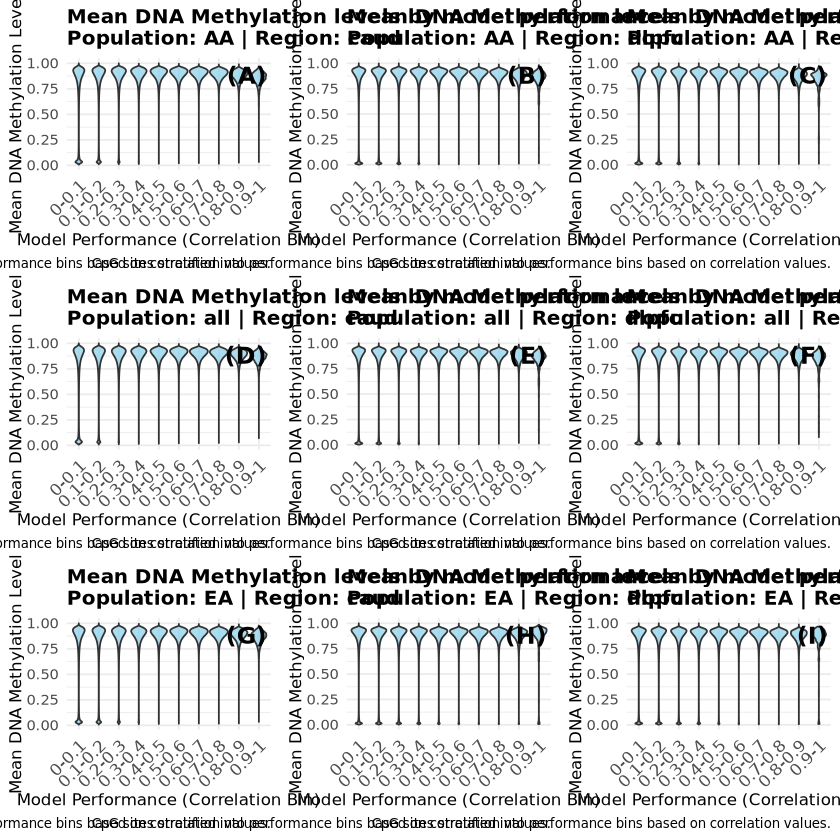

Saved combined Variance DNAm Level violin plots to: DNAm_violin_plots/Combined_VarDNAm_ViolinPlots.png 
Printed combined Variance DNAm Level violin plots to the console.

Creating combined figure for Log Variance of DNA Methylation Levels...


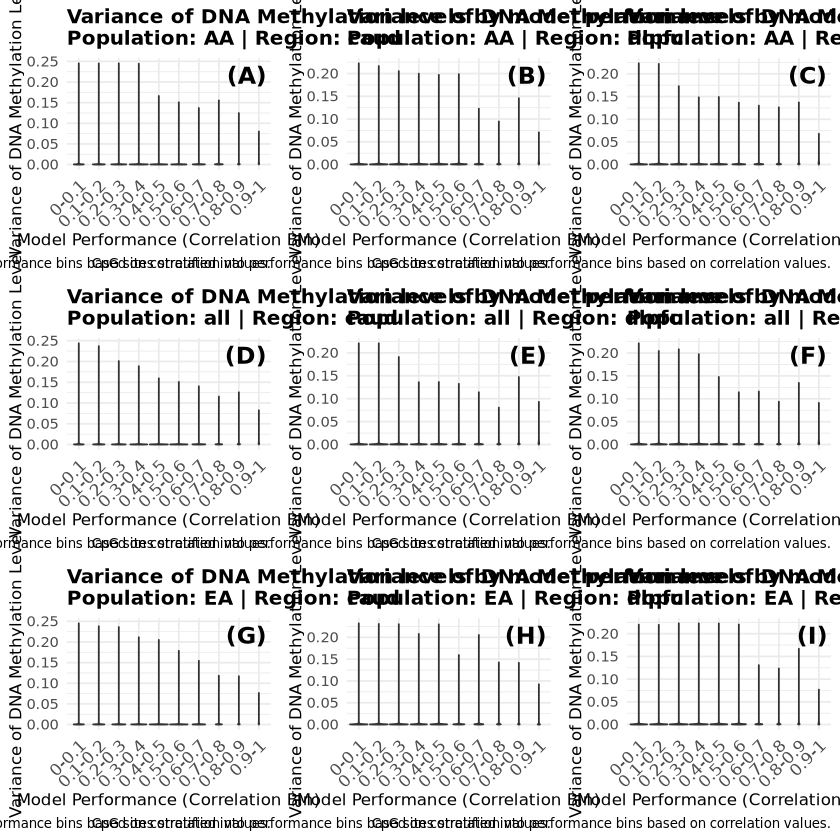

Saved combined Log Variance DNAm Level violin plots to: DNAm_violin_plots/Combined_LogVarDNAm_ViolinPlots.png 
Printed combined Log Variance DNAm Level violin plots to the console.

Comprehensive violin plots generation completed successfully.


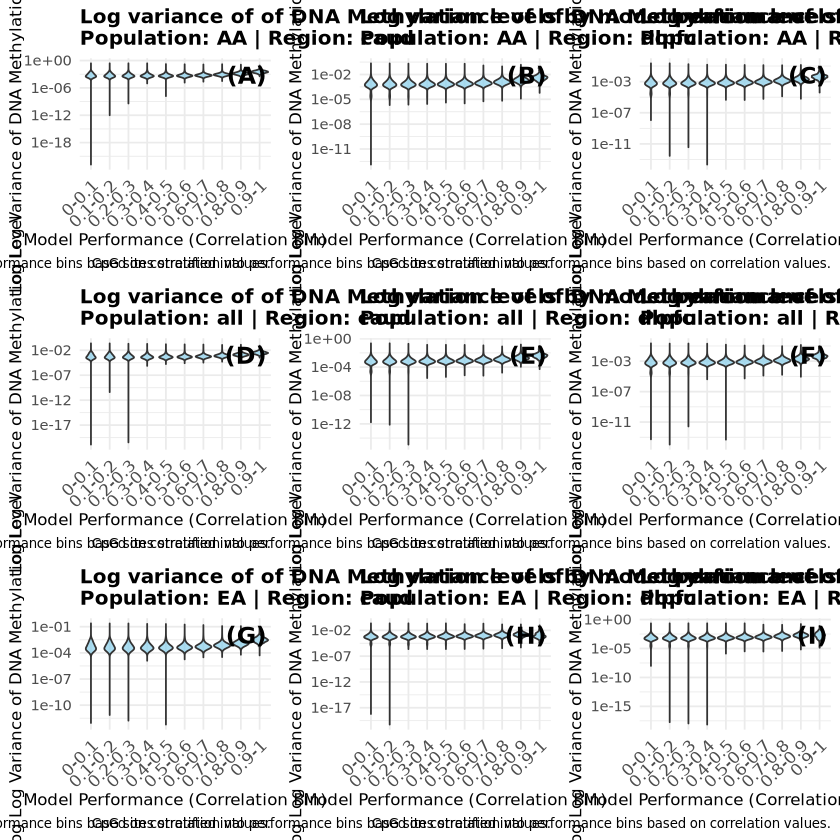

In [91]:
# -----------------------------------------------------
# Updated R Script for Generating Comprehensive Violin Plots from Aggregated DNAm CSVs
# -----------------------------------------------------

# ---------------------------
# 1. Load Necessary Libraries
# ---------------------------

# Install missing packages if necessary
required_packages <- c("data.table", "ggplot2", "stringr", "gridExtra", "grid")
installed_packages <- rownames(installed.packages())

for(p in required_packages){
  if(!(p %in% installed_packages)){
    install.packages(p, dependencies = TRUE)
  }
}

# Load libraries
library(data.table)   # For efficient data manipulation
library(ggplot2)      # For plotting
library(stringr)      # For string operations
library(gridExtra)    # For arranging multiple plots
library(grid)         # For additional grid functionalities

# ---------------------------
# 2. Define User Options
# ---------------------------

# Function to parse command-line arguments
get_args <- function(){
  args <- commandArgs(trailingOnly = TRUE)
  return(args)
}

# Get user-provided N (number of rows to sample)
args <- get_args()

if(length(args) >= 1){
  N <- as.integer(args[1])
  if(is.na(N) || N <= 0){
    warning("Invalid value for N provided. Using all rows for plotting.")
    N <- NULL
  }
} else {
  N <- NULL  # If N is not provided, use all rows
}

# ---------------------------
# 3. Define Aggregated Data Directory
# ---------------------------

aggregated_base_dir <- "aggregated_DNAm_data"

# ---------------------------
# 4. List All Aggregated CSV Files
# ---------------------------

aggregated_files <- list.files(path = aggregated_base_dir, pattern = "\\.csv$", full.names = TRUE)

# Check if any aggregated files are found
if(length(aggregated_files) == 0){
  stop(paste("No aggregated CSV files found in directory:", aggregated_base_dir))
}

# ---------------------------
# 5. Define Output Plots Directory
# ---------------------------

plots_dir <- "DNAm_violin_plots"

# Create the plots directory if it doesn't exist
if (!dir.exists(plots_dir)) {
  dir.create(plots_dir, recursive = TRUE)
  cat(paste("Created plots directory:", plots_dir, "\n"))
} else {
  cat(paste("Plots directory already exists:", plots_dir, "\n"))
}

# ---------------------------
# 6. Define Plotting Function
# ---------------------------

# Function to create a single violin plot
create_violinplot <- function(data, y_var, plot_title, y_label, log_scale = FALSE){
  # Ensure the y_var exists in data
  if(!(y_var %in% names(data))){
    warning(paste("Variable", y_var, "not found in data. Skipping plot:", plot_title))
    return(NULL)
  }
  
  # Initialize ggplot
  p <- ggplot(data, aes(x = performance_bin, y = .data[[y_var]])) +
    geom_violin(fill = "skyblue", alpha = 0.7) +
    theme_minimal() +
    labs(
      title = plot_title,
      x = "Model Performance (Correlation Bin)",
      y = y_label,
      caption = "CpG sites stratified into performance bins based on correlation values."
    ) +
    theme(
      axis.text.x = element_text(angle = 45, hjust = 1, size = 10),
      plot.title = element_text(face = "bold", size = 12),
      axis.title = element_text(size = 10),
      plot.caption = element_text(size = 8)
    )
  
  # Apply log scale if requested
  if(log_scale){
    p <- p + scale_y_log10() +
      labs(y = paste0("Log ", y_label))
  }
  
  return(p)
}

# ---------------------------
# 7. Read and Aggregate Data for Plotting
# ---------------------------

# Initialize lists to hold data for each statistic type
mean_dnAm_list <- list()
var_dnAm_list <- list()
log_var_dnAm_list <- list()

# Extract unique populations and regions for consistent ordering in plots
populations <- unique(sapply(str_extract(basename(aggregated_files), "DNAm_meanvar_(.*?)_"), `[`, 1))
populations <- sapply(populations, function(x) str_replace(x, "DNAm_meanvar_", ""))
populations <- unique(populations)

regions <- unique(sapply(str_extract(basename(aggregated_files), "DNAm_meanvar_.*?_(.*?)_"), `[`, 1))
regions <- sapply(regions, function(x) str_replace(x, "DNAm_meanvar_.*?_", ""))
regions <- unique(regions)

# Alternatively, extract populations and regions directly from 'df' if available
# Here, assuming filenames contain population and region in the format: DNAm_meanvar_<pop>_<reg>_<suffix>.csv

for (fp in aggregated_files) {
  cat(paste("\nProcessing file:", fp, "\n"))
  
  # Read the aggregated CSV file
  aggregated_data <- tryCatch({
    fread(fp)
  }, error = function(e){
    warning(paste("Error reading file:", fp, "| Error:", e$message))
    return(NULL)
  })
  
  # Skip if data could not be read
  if(is.null(aggregated_data)){
    next
  }
  
  # Optionally sample N rows
  if(!is.null(N) && nrow(aggregated_data) > N){
    set.seed(123)  # For reproducibility
    sampled_data <- aggregated_data[sample(.N, N)]
    cat(paste("Sampled", N, "rows for plotting.\n"))
  } else {
    sampled_data <- aggregated_data
    cat(paste("Using all", nrow(sampled_data), "rows for plotting.\n"))
  }
  
  # Extract population and region from filename
  # Assuming filename format: DNAm_meanvar_<pop>_<reg>_<suffix>.csv
  filename <- basename(fp)
  pattern <- "^DNAm_meanvar_(.*?)_(.*?)_.*?\\.csv$"
  matches <- str_match(filename, pattern)
  
  if(is.na(matches[1,1])){
    warning(paste("Filename does not match expected pattern. Skipping file:", filename))
    next
  }
  
  pop <- matches[1,2]
  reg <- matches[1,3]
  
  # Append population and region to data if not already present
  if(!"population" %in% names(sampled_data)){
    sampled_data[, population := pop]
  }
  if(!"region" %in% names(sampled_data)){
    sampled_data[, region := reg]
  }
  
  # Append to respective lists
  mean_dnAm_list[[paste(pop, reg, sep = "_")]] <- sampled_data
  var_dnAm_list[[paste(pop, reg, sep = "_")]] <- sampled_data
  log_var_dnAm_list[[paste(pop, reg, sep = "_")]] <- sampled_data
}

# ---------------------------
# 8. Generate Individual Plots (Optional)
# ---------------------------

# (This section is optional and can be removed if only the combined figures are needed)
# 
# for (name in names(mean_dnAm_list)) {
#   pop <- str_split(name, "_")[[1]][1]
#   reg <- str_split(name, "_")[[1]][2]
#   
#   # Mean DNAm Level Plot
#   p_mean <- create_violinplot(
#     data = mean_dnAm_list[[name]],
#     y_var = "Mean_DNAm_Level",
#     plot_title = paste0("Mean DNA Methylation levels by model performance\nPopulation: ", pop, " | Region: ", reg),
#     y_label = "Mean DNA Methylation Level"
#   )
#   
#   # Variance DNAm Level Plot
#   p_var <- create_violinplot(
#     data = var_dnAm_list[[name]],
#     y_var = "Var_DNAm_Level",
#     plot_title = paste0("Variance of DNA Methylation levels by model performance\nPopulation: ", pop, " | Region: ", reg),
#     y_label = "Variance of DNA Methylation Level"
#   )
#   
#   # Log Variance DNAm Level Plot
#   p_log_var <- create_violinplot(
#     data = log_var_dnAm_list[[name]],
#     y_var = "Var_DNAm_Level",
#     plot_title = paste0("Log Variance of DNA Methylation levels by model performance\nPopulation: ", pop, " | Region: ", reg),
#     y_label = "Log Variance of DNA Methylation Level",
#     log_scale = TRUE
#   )
#   
#   # Save individual plots
#   ggsave(filename = file.path(plots_dir, paste0("Violin_MeanDNAm_", name, ".png")), plot = p_mean, width = 8, height = 6, dpi = 300)
#   ggsave(filename = file.path(plots_dir, paste0("Violin_VarDNAm_", name, ".png")), plot = p_var, width = 8, height = 6, dpi = 300)
#   ggsave(filename = file.path(plots_dir, paste0("Violin_LogVarDNAm_", name, ".png")), plot = p_log_var, width = 8, height = 6, dpi = 300)
#   
#   cat(paste("Saved individual plots for:", name, "\n"))
# }

# ---------------------------
# 9. Prepare Combined Figures
# ---------------------------

# Function to create combined figures for a given statistic
create_combined_figure <- function(data_list, y_var, plot_title_prefix, y_label, log_scale = FALSE){
  plot_list <- list()
  plot_labels <- c("A", "B", "C", "D", "E", "F", "G", "H", "I")
  
  # Ensure consistent ordering: 3 populations x 3 regions
  # Assuming populations and regions are extracted earlier
  # Here, we'll extract them from the names of data_list
  sorted_names <- sort(names(data_list))
  
  for(i in 1:length(sorted_names)){
    name <- sorted_names[i]
    data <- data_list[[name]]
    
    # Extract population and region
    pop_reg <- str_split(name, "_")[[1]]
    pop <- pop_reg[1]
    reg <- pop_reg[2]
    
    # Define plot title
    if(log_scale){
      plot_title <- paste0(toupper(substr(plot_title_prefix, 1,1)), substr(plot_title_prefix, 2, nchar(plot_title_prefix)), 
                           " of DNA Methylation levels by model performance\nPopulation: ", pop, " | Region: ", reg)
    } else {
      plot_title <- paste0(toupper(substr(plot_title_prefix, 1,1)), substr(plot_title_prefix, 2, nchar(plot_title_prefix)), 
                           " DNA Methylation levels by model performance\nPopulation: ", pop, " | Region: ", reg)
    }
    
    # Create violin plot
    p <- create_violinplot(
      data = data,
      y_var = y_var,
      plot_title = plot_title,
      y_label = y_label,
      log_scale = log_scale
    )
    
    # Add label (A), (B), etc.
    if(!is.null(p)){
      p <- p + 
        annotate("text", 
                 x = Inf, y = Inf, 
                 label = paste0("(", plot_labels[i], ")"),
                 hjust = 1.1, vjust = 1.5, 
                 size = 5, fontface = "bold")
      plot_list[[i]] <- p
    }
  }
  
  # Define grid layout: 3 rows x 3 columns
  combined_plot <- grid.arrange(grobs = plot_list, nrow = 3, ncol = 3)
  
  return(combined_plot)
}

# ---------------------------
# 10. Create Combined Figures
# ---------------------------

# Create combined figure for Mean DNAm Level
cat("\nCreating combined figure for Mean DNA Methylation Levels...\n")
combined_mean_plot <- create_combined_figure(
  data_list = mean_dnAm_list,
  y_var = "Mean_DNAm_Level",
  plot_title_prefix = "mean",
  y_label = "Mean DNA Methylation Level",
  log_scale = FALSE
)

# Define filename and save the combined mean plot
mean_plot_filename <- "Combined_MeanDNAm_ViolinPlots.png"
mean_plot_filepath <- file.path(plots_dir, mean_plot_filename)
ggsave(filename = mean_plot_filepath, plot = combined_mean_plot, width = 20, height = 15, dpi = 300)
cat(paste("Saved combined Mean DNAm Level violin plots to:", mean_plot_filepath, "\n"))

# Print to console
grid.newpage()
grid.draw(combined_mean_plot)
cat("Printed combined Mean DNAm Level violin plots to the console.\n")

# Create combined figure for Variance DNAm Level
cat("\nCreating combined figure for Variance of DNA Methylation Levels...\n")
combined_var_plot <- create_combined_figure(
  data_list = var_dnAm_list,
  y_var = "Var_DNAm_Level",
  plot_title_prefix = "variance of",
  y_label = "Variance of DNA Methylation Level",
  log_scale = FALSE
)

# Define filename and save the combined variance plot
var_plot_filename <- "Combined_VarDNAm_ViolinPlots.png"
var_plot_filepath <- file.path(plots_dir, var_plot_filename)
ggsave(filename = var_plot_filepath, plot = combined_var_plot, width = 20, height = 15, dpi = 300)
cat(paste("Saved combined Variance DNAm Level violin plots to:", var_plot_filepath, "\n"))

# Print to console
grid.newpage()
grid.draw(combined_var_plot)
cat("Printed combined Variance DNAm Level violin plots to the console.\n")

# Create combined figure for Log Variance DNAm Level
cat("\nCreating combined figure for Log Variance of DNA Methylation Levels...\n")
combined_log_var_plot <- create_combined_figure(
  data_list = log_var_dnAm_list,
  y_var = "Var_DNAm_Level",
  plot_title_prefix = "log variance of",
  y_label = "Log Variance of DNA Methylation Level",
  log_scale = TRUE
)

# Define filename and save the combined log variance plot
log_var_plot_filename <- "Combined_LogVarDNAm_ViolinPlots.png"
log_var_plot_filepath <- file.path(plots_dir, log_var_plot_filename)
ggsave(filename = log_var_plot_filepath, plot = combined_log_var_plot, width = 20, height = 15, dpi = 300)
cat(paste("Saved combined Log Variance DNAm Level violin plots to:", log_var_plot_filepath, "\n"))

# Print to console
grid.newpage()
grid.draw(combined_log_var_plot)
cat("Printed combined Log Variance DNAm Level violin plots to the console.\n")

# ---------------------------
# 11. End of Script
# ---------------------------

cat("\nComprehensive violin plots generation completed successfully.\n")

In [ ]:
library(data.table)

In [ ]:
fwrite(processed_results, "46-OUT_intermediate_aggregated_DNAm.csv")

## Are Mean DNAm levels really on such low order of magnitude?

In [ ]:
# -----------------------------------------------------
# Proofing R Script for Verifying DNAm Mean Calculations
# -----------------------------------------------------

# ---------------------------
# 1. Load Necessary Libraries
# ---------------------------

# Load required libraries
if (!requireNamespace("data.table", quietly = TRUE)) {
  install.packages("data.table")
}
if (!requireNamespace("stringr", quietly = TRUE)) {
  install.packages("stringr")
}

library(data.table)   # For efficient data manipulation and CSV reading
library(stringr)      # For string operations

# ---------------------------
# 2. Define User Options
# ---------------------------

# Specify the row index you want to proof
# For example, to proof the first row, set row_index <- 1
# You can change this to any valid row number based on your df
row_index <- 1  # Change this as needed

# ---------------------------
# 3. Select the Row for Proofing
# ---------------------------

# Check if `df` exists
if (!exists("df")) {
  stop("The data frame 'df' is not loaded. Please load your data before running the script.")
}

# Validate row_index
if (!is.numeric(row_index) || row_index < 1 || row_index > nrow(df)) {
  stop("Invalid row_index. Please provide a valid row number within the range of 'df'.")
}

# Extract the selected row
row <- df[row_index, ]

cat(paste("Proofing Row:", row_index, "\n"))
cat("========================================\n")

# ---------------------------
# 4. Transform `path` to CSV Path
# ---------------------------

original_path <- row$path_unmodified
cat("\nStep 1: Original Path Transformation\n")
cat("Original Path:", original_path, "\n")

# Replace "a2" with "dt"
transformed_path <- str_replace(original_path, fixed("a2"), "dt")
cat("Transformed Path (Replace 'a2' with 'dt'):", transformed_path, "\n")

# Replace ".rds" with "_cv-eval_combined.csv"
transformed_csv_path <- str_replace(transformed_path, fixed(".rds"), "_cv-eval_combined.csv")
cat("Transformed CSV Path (Replace '.rds' with '_cv-eval_combined.csv'):", transformed_csv_path, "\n")

# Normalize the path
normalized_csv_path <- normalizePath(transformed_csv_path, winslash = "/", mustWork = FALSE)
cat("Normalized CSV Path:", normalized_csv_path, "\n")

# ---------------------------
# 5. Define Output Directory and Filename with Unique Suffix
# ---------------------------

cat("\nStep 2: Define Output Directory and Filename\n")

# Extract the directory path from the transformed CSV path
input_dir <- dirname(normalized_csv_path)
cat("Input Directory:", input_dir, "\n")

# Generate a unique suffix (reuse the one from the main script or generate a new one)
# For consistency, let's reuse the unique_suffix from the main script
# If not available, generate a new one
if (exists("unique_suffix")) {
  suffix <- unique_suffix
} else {
  # Generate a unique suffix
  timestamp <- format(Sys.time(), "%Y%m%d%H%M%S")
  random_num <- sample(1000:9999, 1)
  suffix <- paste0(timestamp, "_", random_num)
}
cat("Unique Suffix:", suffix, "\n")

# Define the new output directory by appending "_DNAm-mean-var" and unique suffix
output_dir <- paste0(input_dir, "_DNAm-mean-var_", suffix)
cat("Output Directory:", output_dir, "\n")

# Create the output directory if it doesn't exist
if (!dir.exists(output_dir)) {
  dir.create(output_dir, recursive = TRUE)
  cat("Created Output Directory.\n")
} else {
  cat("Output Directory already exists.\n")
}

# Extract the base name of the CSV file
csv_basename <- basename(normalized_csv_path)
cat("CSV Base Name:", csv_basename, "\n")

# Remove the original file extension and append "_DNAm_meanvar_<unique_suffix>.csv"
output_filename <- str_replace(csv_basename, "_cv-eval_combined\\.csv$", paste0("_DNAm_meanvar_", suffix, ".csv"))
cat("Output Filename:", output_filename, "\n")

# Define the full path for the output file
output_filepath <- file.path(output_dir, output_filename)
cat("Output File Path:", output_filepath, "\n")

# ---------------------------
# 6. Read Modified Methylation Data (.rds)
# ---------------------------

cat("\nStep 3: Read Modified Methylation Data (.rds)\n")
modified_methylation_path <- row$modified_methylation_data
cat("Modified Methylation Data Path:", modified_methylation_path, "\n")

# Check if the modified methylation file exists
if (!file.exists(modified_methylation_path)) {
  stop(paste("Modified methylation data file does not exist:", modified_methylation_path))
}

# Load the methylation data
methylation_data <- tryCatch({
  readRDS(modified_methylation_path)
}, error = function(e) {
  stop(paste("Error reading modified methylation data:", e$message))
})

cat("Successfully loaded modified methylation data.\n")

In [ ]:
row

In [ ]:
head(modified_methylation_path)

In [ ]:
names(attributes(methylation_data))

In [ ]:
# ---------------------------
# 7. Extract Methylation Matrix
# ---------------------------

cat("\nStep 4: Extract Methylation Matrix\n")

# Check if 'methylations' slot exists
if (!"methylations" %in% slotNames(methylation_data)) {
  stop(paste("The object does not contain 'methylations' slot:", modified_methylation_path))
}

# Extract the methylation matrix (samples as rows, positions as columns)
methylations_matrix <- tryCatch({
  as.matrix(methylation_data@methylations)
}, error = function(e) {
  stop(paste("Error extracting methylation matrix:", e$message))
})

cat("Methylation Matrix Dimensions (Samples x CpGs):", dim(methylations_matrix)[1], "x", dim(methylations_matrix)[2], "\n")

# Display a small portion of the methylation matrix for verification
cat("Sample of Methylation Matrix:\n")
print(head(methylations_matrix[, 1:5]))  # Display first 5 CpGs

# ---------------------------
# 8. Calculate Mean and Variance DNAm Levels
# ---------------------------

cat("\nStep 5: Calculate Mean and Variance DNAm Levels\n")

# Calculate column-wise mean
cat("Calculating column-wise means...\n")
mean_dnAm <- tryCatch({
  colMeans(methylations_matrix, na.rm = TRUE)
}, error = function(e) {
  stop(paste("Error calculating column-wise means:", e$message))
})
cat("Sample of Calculated Means:\n")
print(head(mean_dnAm))

# Calculate column-wise variance
cat("Calculating column-wise variances...\n")
var_dnAm <- tryCatch({
  apply(methylations_matrix, 2, var, na.rm = TRUE)
}, error = function(e) {
  stop(paste("Error calculating column-wise variances:", e$message))
})
cat("Sample of Calculated Variances:\n")
print(head(var_dnAm))

# ---------------------------
# 9. Create Statistics Data Frame
# ---------------------------

cat("\nStep 6: Create Statistics Data Frame\n")

# Extract CpG positions from column names by removing 'pos_' prefix
cg_numeric <- as.numeric(str_replace(colnames(methylations_matrix), "^pos_", ""))
cat("Sample CpG Positions:\n")
print(head(cg_numeric))

# Check for NAs introduced by coercion
if (any(is.na(cg_numeric))) {
  warning("NAs introduced by coercion when converting column names to numeric for 'cg_numeric'.")
  # Remove positions with NA cg_numeric
  valid_indices <- which(!is.na(cg_numeric))
  cg_numeric <- cg_numeric[valid_indices]
  mean_dnAm <- mean_dnAm[valid_indices]
  var_dnAm <- var_dnAm[valid_indices]
  methylations_matrix <- methylations_matrix[, valid_indices, drop = FALSE]
  cat("Removed CpGs with NA positions. New Dimensions:", dim(methylations_matrix)[2], "CpGs\n")
}

# Create a data frame with statistics
stats_df <- data.frame(
  cg_numeric = cg_numeric,
  Mean_DNAm_Level = mean_dnAm,
  Var_DNAm_Level = var_dnAm,
  stringsAsFactors = FALSE
)

cat("Statistics Data Frame Head:\n")
print(head(stats_df))

# ---------------------------
# 10. Read CSV Data
# ---------------------------

cat("\nStep 7: Read CSV Data\n")
cat("CSV Data Path:", normalized_csv_path, "\n")

# Check if the CSV file exists
if (!file.exists(normalized_csv_path)) {
  stop(paste("CSV data file does not exist:", normalized_csv_path))
}

# Read the CSV file using data.table::fread for efficiency
csv_data <- tryCatch({
  fread(normalized_csv_path)
}, error = function(e) {
  stop(paste("Error reading CSV data:", e$message))
})

cat("CSV Data Dimensions (Rows x Columns):", dim(csv_data)[1], "x", dim(csv_data)[2], "\n")

# Display a small portion of the CSV data for verification
cat("Sample of CSV Data:\n")
print(head(csv_data))

# ---------------------------
# 11. Merge Statistics with CSV Data
# ---------------------------

cat("\nStep 8: Merge Statistics with CSV Data\n")

# Ensure 'cg' exists and is numeric
if (!"cg" %in% names(csv_data)) {
  stop("Column 'cg' not found in CSV data.")
}

# Convert 'cg' to numeric
csv_data[, cg_numeric := as.numeric(cg)]
cat("Sample 'cg_numeric' after conversion:\n")
print(head(csv_data$cg_numeric))

# Remove rows with NA cg_numeric
initial_rows <- nrow(csv_data)
csv_data <- csv_data[!is.na(cg_numeric)]
final_rows <- nrow(csv_data)
cat(paste("Removed", initial_rows - final_rows, "rows with NA 'cg_numeric'. New Rows:", final_rows, "\n"))

# Merge stats with CSV data on 'cg_numeric'
merged_data <- merge(csv_data, stats_df, by = "cg_numeric", all.x = TRUE)
cat("Merged Data Dimensions (Rows x Columns):", dim(merged_data)[1], "x", dim(merged_data)[2], "\n")

# Display a sample of the merged data
cat("Sample of Merged Data:\n")
print(head(merged_data))

# ---------------------------
# 12. Categorize Model Performance into Bins
# ---------------------------

cat("\nStep 9: Categorize Model Performance into Bins\n")

# Check if 'cor' column exists
if (!"cor" %in% names(merged_data)) {
  stop("Column 'cor' not found in merged data.")
}

# Categorize 'cor' into performance bins
merged_data[, performance_bin := categorize_performance(cor)]
cat("Sample of 'performance_bin' after categorization:\n")
print(head(merged_data$performance_bin))

# Remove rows with NA performance_bin
initial_rows_perf <- nrow(merged_data)
merged_data <- merged_data[!is.na(performance_bin)]
final_rows_perf <- nrow(merged_data)
cat(paste("Removed", initial_rows_perf - final_rows_perf, "rows with NA 'performance_bin'. New Rows:", final_rows_perf, "\n"))

# ---------------------------
# 13. Add Group Identifiers
# ---------------------------

cat("\nStep 10: Add Group Identifiers\n")
merged_data[, population := row$population]
merged_data[, region := row$region]
cat("Added 'population' and 'region' columns:\n")
print(head(merged_data[, .(population, region)]))

# ---------------------------
# 14. Save the Combined Data as CSV
# ---------------------------

cat("\nStep 11: Save the Combined Data as CSV\n")

# Save the combined data as a CSV file
save_status <- tryCatch({
  fwrite(merged_data, output_filepath)
  TRUE
}, error = function(e) {
  stop(paste("Error saving processed data:", e$message))
})

if (save_status) {
  cat("Successfully saved combined data to:", output_filepath, "\n")
} else {
  cat("Failed to save combined data.\n")
}

# ---------------------------
# 15. Verify Mean DNAm Calculations
# ---------------------------

cat("\nStep 12: Verify Mean DNAm Calculations\n")

# For proofing, let's manually calculate the mean for a specific CpG and compare

# Select a CpG to verify
# For example, the first CpG in the stats_df
selected_cpg <- stats_df$cg_numeric[1]
cat(paste("Selected CpG for verification:", selected_cpg, "\n"))

# Extract all methylation values for the selected CpG from the methylations_matrix
methyl_values <- methylations_matrix[, selected_cpg]
cat("Methylation Values for Selected CpG:\n")
print(head(methyl_values))

# Calculate mean manually
manual_mean <- mean(methyl_values, na.rm = TRUE)
cat(paste("Manually Calculated Mean DNAm Level:", manual_mean, "\n"))

# Compare with the value in stats_df
calculated_mean <- stats_df$Mean_DNAm_Level[stats_df$cg_numeric == selected_cpg]
cat(paste("Calculated Mean DNAm Level from stats_df:", calculated_mean, "\n"))

# Check if they match
if (abs(manual_mean - calculated_mean) < 1e-10) {
  cat("Verification Passed: Manual mean matches the calculated mean.\n")
} else {
  cat("Verification Failed: Manual mean does not match the calculated mean.\n")
  cat(paste("Difference:", abs(manual_mean - calculated_mean), "\n"))
}

# ---------------------------
# 16. End of Proofing Script
# ---------------------------

cat("\nProofing completed successfully.\n")